# DA Algorithm
### 中田 竜明

In [73]:
include("da.jl")

DA

[ソースコード:da.jl](https://github.com/nswa17/DA_alg.jl/blob/master/da.jl)

In [2]:
m, n = 100, 100
m_prefs, f_prefs = DA.generate_random_preference_data(m, n)
DA.check_data(m_prefs, f_prefs)

true

まずm, nそれぞれに100を設定し, ランダムな選好表を作成します. ついでにデータのチェックも行っています.

In [5]:
m_matched, f_matched = DA.call_match(m_prefs, f_prefs)
DA.check_results(m_matched, f_matched)

true

DAアルゴリズムを走らせて結果を得ました. 結果も問題ないようです.

In [25]:
DA.stable_matching(m_matched, f_matched, m_prefs, f_prefs)

true

きちんと安定マッチングになっています. もちろん次のマッチングは安定ではないので,

In [27]:
DA.stable_matching([1 2], [1 2], [2 1; 1 2; 0 0], [2 1; 1 2; 0 0])

false

In [16]:
transpose(m_matched)

1x100 Array{Int64,2}:
 90  21  31  20  38  73  96  22  27  61  …  80  44  62  7  9  69  33  66  41

In [17]:
transpose(f_matched)

1x100 Array{Int64,2}:
 63  67  0  23  90  21  6  86  5  32  …  13  0  24  83  94  48  17  79  34

シンプル版でも同様に安定マッチングが得られます.

In [5]:
m, n = 100, 100
m_prefs, f_prefs = DA.generate_random_preference_data(m, n)
DA.check_data(m_prefs, f_prefs)

m_matched, f_matched = DA.call_simple_match(m_prefs, f_prefs)
DA.check_results(m_matched, f_matched)
DA.stable_matching(m_matched, f_matched, m_prefs, f_prefs)

true

テストを行います.

In [2]:
deferred_acceptance = DA.call_match
include("test_deferred_acceptance.jl")
println()

Test Summary: | Pass  Total
Testing da.jl |    4      4



通りました. 再帰版, シンプル版では,,

In [2]:
deferred_acceptance = (x, y) -> DA.call_match(x, y, true)
include("test_deferred_acceptance.jl")
println()

Test Summary: | Pass  Total
Testing da.jl |    4      4



In [4]:
deferred_accpetance = DA.call_simple_match
include("test_deferred_acceptance.jl")
println()

Test Summary: | Pass  Total
Testing da.jl |    4      4



通ったようです.

次にスピードを計測します. m,nと繰り返し回数, 再帰かどうかを引数に取る関数をとりあえず作りました. 

In [6]:
function speedtest1(m, n, l, rec)
    m_prefs, f_prefs = DA.generate_random_preference_data(m, n)
    for i in 1:l
        DA.call_match(m_prefs, f_prefs, rec)
    end
end

speedtest1 (generic function with 1 method)

以下の結果を得ました.再帰かそうでないかではコードの一部しか変わっていないのですが, かなり速度差が出ているようです.

当然のことながらメモリ割り当ても再帰のほうが多く, それぞれ１０倍近いようです.
```
@time speedtest1(10, 10, 1000, true) # => 0.311742 seconds (1.41 M allocations: 89.571 MB, 9.54% gc time)
@time speedtest1(10, 10, 1000, false) # =>  0.051650 seconds (228.50 k allocations: 19.520 MB, 7.10% gc time)
@time speedtest1(100, 100, 100, true) # =>  5.819466 seconds (20.06 M allocations: 1.587 GB, 4.37% gc time)
@time speedtest1(100, 100, 100, false) # =>  0.166037 seconds (216.80 k allocations: 74.657 MB, 8.77% gc time)
```

次にProfileでどこが遅いかを見てみます. まずは再帰を使わない時から.
```
@profile test1(100, 100, 100, false)
Profile.print()
```

```
244 task.jl; anonymous; line: 447
 244 .../IJulia/src/IJulia.jl; eventloop; line: 143
  244 ...rc/execute_request.jl; execute_request_0x535c5df2; line: 183
   244 loading.jl; include_string; line: 282
    244 profile.jl; anonymous; line: 16
     167 In[167]; test1; line: 3
      2  ...zemi/DA_alg.jl/da.jl; generate_random_preference_data; line: 37
      92 ...zemi/DA_alg.jl/da.jl; generate_random_preference_data; line: 39
       7  ...lib/julia/sys.dylib; vcat; (unknown line)
       10 array.jl; copy; line: 100
       3  multidimensional.jl; _unsafe_batchsetindex!; line: 328
       1  multidimensional.jl; _unsafe_batchsetindex!; line: 329
       1  random.jl; call; line: 475
       66 random.jl; shuffle!; line: 1330
        4  random.jl; call; line: 471
        14 random.jl; call; line: 475
         14 random.jl; maxmultiplemix; line: 445
        10 random.jl; rand; line: 514
        1  random.jl; rand; line: 515
        12 random.jl; rand; line: 516
         7 random.jl; gen_rand; line: 88
          7 dSFMT.jl; dsfmt_fill_array_close1_open2!; line: 67
        1  random.jl; rand; line: 518
        20 random.jl; rand; line: 526
       1  random.jl; shuffle!; line: 1333
      72 ...zemi/DA_alg.jl/da.jl; generate_random_preference_data; line: 42
       6  ...lib/julia/sys.dylib; vcat; (unknown line)
       3  cartesian.jl; _unsafe_batchsetindex!; line: 34
       4  multidimensional.jl; _unsafe_batchsetindex!; line: 328
       1  random.jl; call; line: 475
       55 random.jl; shuffle!; line: 1330
        3  random.jl; call; line: 471
        16 random.jl; call; line: 475
         16 random.jl; maxmultiplemix; line: 445
        6  random.jl; rand; line: 514
        6  random.jl; rand; line: 516
         2 random.jl; gen_rand; line: 88
          2 dSFMT.jl; dsfmt_fill_array_close1_open2!; line: 67
        1  random.jl; rand; line: 518
        1  random.jl; rand; line: 523
        17 random.jl; rand; line: 526
       3  random.jl; shuffle!; line: 1331
     77  In[167]; test1; line: 4
      6  ...zemi/DA_alg.jl/da.jl; call_match; line: 51
       1 array.jl; findnext; line: 717
       2 multidimensional.jl; _unsafe_getindex; line: 193
       3 multidimensional.jl; _unsafe_getindex; line: 195
      70 ...zemi/DA_alg.jl/da.jl; call_match; line: 57
       70 ...emi/DA_alg.jl/da.jl; da_match; line: 143
        70 ...emi/DA_alg.jl/da.jl; decide_to_accept!; line: 111
         46 ...emi/DA_alg.jl/da.jl; get_best_male_pointers!; line: 100
          1  array.jl; findin; line: 889
          28 array.jl; findin; line: 890
           25 ...lib/julia/sys.dylib; zeros; (unknown line)
            3 ...lib/julia/sys.dylib; call; (unknown line)
          17 array.jl; findin; line: 892
           14 ...lib/julia/sys.dylib; ht_keyindex; (unknown line)
            3 ...lib/julia/sys.dylib; hash_64_64; (unknown line)
         24 ...emi/DA_alg.jl/da.jl; get_best_male_pointers!; line: 102
          11 abstractarray.jl; map; line: 1305
           11 ...mi/DA_alg.jl/da.jl; anonymous; line: 102
            6 abstractarray.jl; getindex; line: 488
             5 multidimensional.jl; _unsafe_getindex; line: 193
          4  abstractarray.jl; map; line: 1306
           3 ...lib/julia/sys.dylib; call; (unknown line)
          1  abstractarray.jl; map; line: 1307
          6  abstractarray.jl; map; line: 1308
           1 abstractarray.jl; map_to!; line: 1286
            1 ...mi/DA_alg.jl/da.jl; anonymous; line: 102
      1  ...zemi/DA_alg.jl/da.jl; call_match; line: 58
       1 ...zemi/DA_alg.jl/da.jl; convert_pointer_to_list; line: 71
        1 array.jl; findnext; line: 717
```

再帰を使うと...
```
@profile test1(100, 100, 100, true)
Profile.print()
```

```
4    ...a/lib/julia/sys.dylib; ht_keyindex; (unknown line)
4    abstractarray.jl; map; line: 1306
3    array.jl; findin; line: 890
1    array.jl; findnext; line: 715
1    multidimensional.jl; checksize; line: 270
1    random.jl; maxmultiplemix; line: 445
4887 task.jl; anonymous; line: 447
 4887 .../IJulia/src/IJulia.jl; eventloop; line: 143
  4887 ...rc/execute_request.jl; execute_request_0x535c5df2; line: 183
   4887 loading.jl; include_string; line: 282
    4887 profile.jl; anonymous; line: 16
     237  In[167]; test1; line: 3
      2   ...zemi/DA_alg.jl/da.jl; generate_random_preference_data; line: 37
      126 ...zemi/DA_alg.jl/da.jl; generate_random_preference_data; line: 39
       7  ...lib/julia/sys.dylib; vcat; (unknown line)
       10 array.jl; copy; line: 100
       3  multidimensional.jl; _unsafe_batchsetindex!; line: 328
       1  multidimensional.jl; _unsafe_batchsetindex!; line: 329
       1  random.jl; call; line: 475
       92 random.jl; shuffle!; line: 1330
        7  random.jl; call; line: 471
        22 random.jl; call; line: 475
         21 random.jl; maxmultiplemix; line: 445
        14 random.jl; rand; line: 514
        1  random.jl; rand; line: 515
        15 random.jl; rand; line: 516
         9 random.jl; gen_rand; line: 88
          9 dSFMT.jl; dsfmt_fill_array_close1_open2!; line: 67
        1  random.jl; rand; line: 518
        25 random.jl; rand; line: 526
       5  random.jl; shuffle!; line: 1331
       1  random.jl; shuffle!; line: 1333
      108 ...zemi/DA_alg.jl/da.jl; generate_random_preference_data; line: 42
       7  ...lib/julia/sys.dylib; vcat; (unknown line)
       3  array.jl; copy; line: 100
       3  cartesian.jl; _unsafe_batchsetindex!; line: 34
       5  multidimensional.jl; _unsafe_batchsetindex!; line: 328
       1  multidimensional.jl; _unsafe_batchsetindex!; line: 329
       1  random.jl; call; line: 475
       81 random.jl; shuffle!; line: 1330
        3  random.jl; call; line: 471
        22 random.jl; call; line: 475
         22 random.jl; maxmultiplemix; line: 445
        12 random.jl; rand; line: 514
        9  random.jl; rand; line: 516
         4 random.jl; gen_rand; line: 88
          4 dSFMT.jl; dsfmt_fill_array_close1_open2!; line: 67
        1  random.jl; rand; line: 518
        1  random.jl; rand; line: 523
        25 random.jl; rand; line: 526
       7  random.jl; shuffle!; line: 1331
     4650 In[167]; test1; line: 4
      7    ...emi/DA_alg.jl/da.jl; call_match; line: 51
       1 array.jl; findnext; line: 717
       3 multidimensional.jl; _unsafe_getindex; line: 193
       3 multidimensional.jl; _unsafe_getindex; line: 195
      1    ...emi/DA_alg.jl/da.jl; call_match; line: 53
       1 ...a/lib/julia/sys.dylib; call; (unknown line)
        1 .../lib/julia/sys.dylib; call; (unknown line)
      4641 ...emi/DA_alg.jl/da.jl; call_match; line: 57
       70   ...emi/DA_alg.jl/da.jl; da_match; line: 143
        70 ...emi/DA_alg.jl/da.jl; decide_to_accept!; line: 111
         46 ...emi/DA_alg.jl/da.jl; get_best_male_pointers!; line: 100
          1  array.jl; findin; line: 889
          28 array.jl; findin; line: 890
           25 ...lib/julia/sys.dylib; zeros; (unknown line)
            3 ...lib/julia/sys.dylib; call; (unknown line)
          17 array.jl; findin; line: 892
           14 ...lib/julia/sys.dylib; ht_keyindex; (unknown line)
            3 ...lib/julia/sys.dylib; hash_64_64; (unknown line)
         24 ...emi/DA_alg.jl/da.jl; get_best_male_pointers!; line: 102
          11 abstractarray.jl; map; line: 1305
           11 ...mi/DA_alg.jl/da.jl; anonymous; line: 102
            6 abstractarray.jl; getindex; line: 488
             5 multidimensional.jl; _unsafe_getindex; line: 193
          4  abstractarray.jl; map; line: 1306
           3 ...lib/julia/sys.dylib; call; (unknown line)
          1  abstractarray.jl; map; line: 1307
          6  abstractarray.jl; map; line: 1308
           1 abstractarray.jl; map_to!; line: 1286
            1 ...mi/DA_alg.jl/da.jl; anonymous; line: 102
       38   ...emi/DA_alg.jl/da.jl; recursive_da_match; line: 128
        38 ...emi/DA_alg.jl/da.jl; decide_to_accept!; line: 111
         25 ...emi/DA_alg.jl/da.jl; get_best_male_pointers!; line: 100
          18 array.jl; findin; line: 890
           17 ...lib/julia/sys.dylib; zeros; (unknown line)
            1 ...lib/julia/sys.dylib; call; (unknown line)
          7  array.jl; findin; line: 892
           5 ...lib/julia/sys.dylib; ht_keyindex; (unknown line)
            1 ...lib/julia/sys.dylib; hash_64_64; (unknown line)
         13 ...emi/DA_alg.jl/da.jl; get_best_male_pointers!; line: 102
          9 abstractarray.jl; map; line: 1305
           9 ...mi/DA_alg.jl/da.jl; anonymous; line: 102
            6 abstractarray.jl; getindex; line: 488
             4 multidimensional.jl; _unsafe_getindex; line: 193
             1 multidimensional.jl; _unsafe_getindex; line: 194
              1 multidimensional.jl; checksize; line: 270
             1 multidimensional.jl; _unsafe_getindex; line: 195
            1 array.jl; findfirst; line: 722
             1 array.jl; findnext; line: 716
          1 abstractarray.jl; map; line: 1306
           1 ...lib/julia/sys.dylib; call; (unknown line)
          2 abstractarray.jl; map; line: 1307
          1 abstractarray.jl; map; line: 1308
       4533 ...emi/DA_alg.jl/da.jl; recursive_da_match; line: 133
(以下長いので略)
```

再帰を使うところで激遅になっている事がわかります. 

------

この後速度を早くするためにアルゴリズムを調整しました.　map関数を書き換えたり...

結果がこちらです.

In [9]:
@time speedtest1(10, 10, 1000, true)
@time speedtest1(10, 10, 1000, false)
@time speedtest1(100, 100, 100, true)
@time speedtest1(100, 100, 100, false)

  0.008510 seconds (104.07 k allocations: 8.050 MB, 15.10% gc time)
  0.004992 seconds (75.07 k allocations: 5.960 MB)
  0.061316 seconds (235.61 k allocations: 97.252 MB, 7.98% gc time)
  0.047922 seconds (188.11 k allocations: 75.882 MB, 10.25% gc time)


参考までに,先ほどの結果は
```
@time speedtest1(10, 10, 1000, true) # => 0.311742 seconds (1.41 M allocations: 89.571 MB, 9.54% gc time)
@time speedtest1(10, 10, 1000, false) # =>  0.051650 seconds (228.50 k allocations: 19.520 MB, 7.10% gc time)
@time speedtest1(100, 100, 100, true) # =>  5.819466 seconds (20.06 M allocations: 1.587 GB, 4.37% gc time)
@time speedtest1(100, 100, 100, false) # =>  0.166037 seconds (216.80 k allocations: 74.657 MB, 8.77% gc time)
```

再帰に関して速度が30~100倍ほど早くなってしまいました. 普通のアルゴリズムでも4~10倍の速度が出ています.

さらに再帰なし版について測ってみます.

In [10]:
for i in 1:40
    @time speedtest1(10*i, 10*i, 1000, false)
end

  0.004421 seconds (71.06 k allocations: 5.624 MB)
  0.037412 seconds (248.12 k allocations: 27.522 MB, 7.17% gc time)
  0.099779 seconds (521.18 k allocations: 81.949 MB, 22.67% gc time)
  0.133260 seconds (634.24 k allocations: 131.947 MB, 24.82% gc time)
  0.191103 seconds (855.30 k allocations: 216.210 MB, 27.00% gc time)
  0.310273 seconds (1.25 M allocations: 333.764 MB, 26.73% gc time)
  0.457669 seconds (1.62 M allocations: 497.376 MB, 27.68% gc time)
  0.692682 seconds (2.14 M allocations: 701.836 MB, 25.76% gc time)
  0.832984 seconds (2.29 M allocations: 840.361 MB, 26.24% gc time)
  0.878811 seconds (3.46 M allocations: 1.400 GB, 9.25% gc time)
  0.993192 seconds (2.74 M allocations: 1.256 GB, 30.86% gc time)
  1.367815 seconds (3.09 M allocations: 1.532 GB, 32.09% gc time)
  1.301243 seconds (2.55 M allocations: 1.312 GB, 30.13% gc time)
  2.237044 seconds (4.48 M allocations: 2.468 GB, 29.92% gc time)
  2.205013 seconds (4.70 M allocations: 2.874 GB, 31.66% gc time)
  2.0

In [93]:
k1 = "0.004421 seconds (71.06 k allocations: 5.624 MB)
  0.037412 seconds (248.12 k allocations: 27.522 MB, 7.17% gc time)
  0.099779 seconds (521.18 k allocations: 81.949 MB, 22.67% gc time)
  0.133260 seconds (634.24 k allocations: 131.947 MB, 24.82% gc time)
  0.191103 seconds (855.30 k allocations: 216.210 MB, 27.00% gc time)
  0.310273 seconds (1.25 M allocations: 333.764 MB, 26.73% gc time)
  0.457669 seconds (1.62 M allocations: 497.376 MB, 27.68% gc time)
  0.692682 seconds (2.14 M allocations: 701.836 MB, 25.76% gc time)
  0.832984 seconds (2.29 M allocations: 840.361 MB, 26.24% gc time)
  0.878811 seconds (3.46 M allocations: 1.400 GB, 9.25% gc time)
  0.993192 seconds (2.74 M allocations: 1.256 GB, 30.86% gc time)
  1.367815 seconds (3.09 M allocations: 1.532 GB, 32.09% gc time)
  1.301243 seconds (2.55 M allocations: 1.312 GB, 30.13% gc time)
  2.237044 seconds (4.48 M allocations: 2.468 GB, 29.92% gc time)
  2.205013 seconds (4.70 M allocations: 2.874 GB, 31.66% gc time)
  2.086873 seconds (4.37 M allocations: 2.701 GB, 32.63% gc time)
  2.101123 seconds (4.19 M allocations: 2.788 GB, 31.85% gc time)
  2.567895 seconds (4.72 M allocations: 3.490 GB, 34.02% gc time)
  2.969407 seconds (5.13 M allocations: 3.732 GB, 31.52% gc time)
  3.714042 seconds (6.52 M allocations: 5.371 GB, 35.73% gc time)
  3.787283 seconds (6.32 M allocations: 5.131 GB, 33.18% gc time)
  4.514897 seconds (6.49 M allocations: 5.807 GB, 31.63% gc time)
  5.164590 seconds (7.76 M allocations: 7.152 GB, 34.44% gc time)
  5.747971 seconds (8.46 M allocations: 7.853 GB, 34.77% gc time)
  6.480615 seconds (8.99 M allocations: 8.347 GB, 24.20% gc time)
  6.782499 seconds (9.74 M allocations: 9.585 GB, 26.25% gc time)
  6.782342 seconds (8.88 M allocations: 8.910 GB, 23.63% gc time)
  8.031126 seconds (10.02 M allocations: 10.516 GB, 23.85% gc time)
 10.519969 seconds (11.87 M allocations: 12.479 GB, 20.23% gc time)
 11.867743 seconds (14.76 M allocations: 16.530 GB, 22.95% gc time)
 10.758971 seconds (12.08 M allocations: 13.944 GB, 23.81% gc time)
 15.402221 seconds (15.50 M allocations: 18.253 GB, 21.33% gc time)
 15.754614 seconds (15.44 M allocations: 18.548 GB, 20.83% gc time)
 14.622754 seconds (14.73 M allocations: 18.252 GB, 21.03% gc time)
 14.426842 seconds (16.11 M allocations: 20.856 GB, 23.57% gc time)
 13.807909 seconds (14.75 M allocations: 19.492 GB, 21.82% gc time)
 17.929274 seconds (20.84 M allocations: 28.949 GB, 24.73% gc time)
 18.154148 seconds (18.20 M allocations: 25.866 GB, 24.07% gc time)
 20.904895 seconds (18.72 M allocations: 26.485 GB, 20.84% gc time)
 19.857537 seconds (19.01 M allocations: 28.425 GB, 23.69% gc time)"

function get_seconds(s::AbstractString)
    return matchall(r"\d+\.\d{6}", s)
end

get_seconds (generic function with 1 method)

得たデータをプロットしてみます.

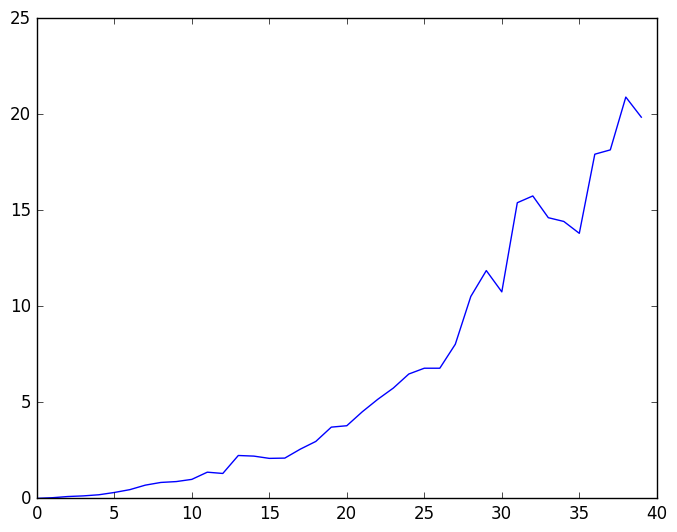

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3229b4d68>

In [22]:
using PyPlot

plot(get_seconds(k1))

たまたまの可能性がありますがDAアルゴリズムの計算量$n^2$を表してるように見えなくもない(?). 
再帰なし版だと...

In [13]:
for i in 1:40
    @time speedtest1(1*i, 1*i, 1000, false)
end

  0.000931 seconds (14.01 k allocations: 750.563 KB)
  0.000957 seconds (18.02 k allocations: 985.500 KB)
  0.001312 seconds (24.02 k allocations: 1.299 MB)
  0.001952 seconds (35.03 k allocations: 2.001 MB)
  0.002749 seconds (46.03 k allocations: 2.719 MB)
  0.003422 seconds (56.04 k allocations: 3.636 MB)
  0.004385 seconds (63.05 k allocations: 4.048 MB)
  0.007769 seconds (63.05 k allocations: 4.630 MB, 49.62% gc time)
  0.004949 seconds (71.06 k allocations: 5.210 MB)
  0.004288 seconds (65.06 k allocations: 5.258 MB)
  0.006425 seconds (85.07 k allocations: 6.617 MB)
  0.007728 seconds (74.08 k allocations: 6.481 MB, 31.38% gc time)
  0.007383 seconds (105.08 k allocations: 9.336 MB)
  0.015663 seconds (160.09 k allocations: 14.709 MB, 20.79% gc time)
  0.022754 seconds (169.09 k allocations: 15.610 MB, 29.25% gc time)
  0.019703 seconds (198.10 k allocations: 19.336 MB)
  0.019738 seconds (134.10 k allocations: 13.691 MB, 28.81% gc time)
  0.022365 seconds (181.11 k allocations

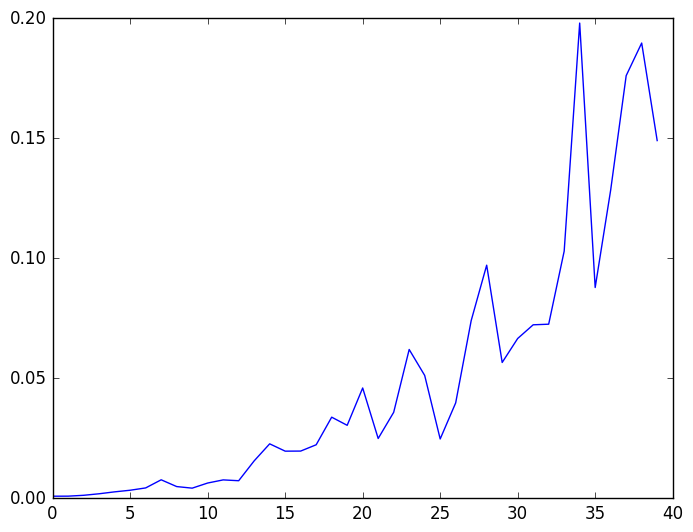

In [21]:
k2 = " 0.000931 seconds (14.01 k allocations: 750.563 KB)
  0.000957 seconds (18.02 k allocations: 985.500 KB)
  0.001312 seconds (24.02 k allocations: 1.299 MB)
  0.001952 seconds (35.03 k allocations: 2.001 MB)
  0.002749 seconds (46.03 k allocations: 2.719 MB)
  0.003422 seconds (56.04 k allocations: 3.636 MB)
  0.004385 seconds (63.05 k allocations: 4.048 MB)
  0.007769 seconds (63.05 k allocations: 4.630 MB, 49.62% gc time)
  0.004949 seconds (71.06 k allocations: 5.210 MB)
  0.004288 seconds (65.06 k allocations: 5.258 MB)
  0.006425 seconds (85.07 k allocations: 6.617 MB)
  0.007728 seconds (74.08 k allocations: 6.481 MB, 31.38% gc time)
  0.007383 seconds (105.08 k allocations: 9.336 MB)
  0.015663 seconds (160.09 k allocations: 14.709 MB, 20.79% gc time)
  0.022754 seconds (169.09 k allocations: 15.610 MB, 29.25% gc time)
  0.019703 seconds (198.10 k allocations: 19.336 MB)
  0.019738 seconds (134.10 k allocations: 13.691 MB, 28.81% gc time)
  0.022365 seconds (181.11 k allocations: 18.851 MB, 24.45% gc time)
  0.033865 seconds (245.12 k allocations: 25.673 MB, 16.76% gc time)
  0.030471 seconds (244.12 k allocations: 27.248 MB, 17.19% gc time)
  0.046028 seconds (262.13 k allocations: 29.965 MB, 25.92% gc time)
  0.024981 seconds (201.13 k allocations: 23.926 MB, 21.84% gc time)
  0.035885 seconds (296.14 k allocations: 35.082 MB, 16.36% gc time)
  0.062064 seconds (410.15 k allocations: 63.610 MB, 24.60% gc time)
  0.051262 seconds (316.15 k allocations: 48.902 MB, 29.87% gc time)
  0.024780 seconds (172.16 k allocations: 27.786 MB, 25.54% gc time)
  0.039818 seconds (293.17 k allocations: 46.725 MB, 25.64% gc time)
  0.074092 seconds (453.17 k allocations: 67.174 MB, 20.40% gc time)
  0.097192 seconds (515.18 k allocations: 78.498 MB, 22.08% gc time)
  0.056652 seconds (370.18 k allocations: 59.198 MB, 18.52% gc time)
  0.066648 seconds (368.19 k allocations: 57.338 MB, 26.43% gc time)
  0.072351 seconds (404.19 k allocations: 74.438 MB, 23.31% gc time)
  0.072605 seconds (383.20 k allocations: 71.191 MB, 28.22% gc time)
  0.103042 seconds (535.21 k allocations: 96.584 MB, 23.62% gc time)
  0.198075 seconds (765.21 k allocations: 139.647 MB, 21.58% gc time)
  0.087888 seconds (421.22 k allocations: 74.342 MB, 25.63% gc time)
  0.128518 seconds (531.23 k allocations: 99.827 MB, 21.67% gc time)
  0.176163 seconds (554.23 k allocations: 102.744 MB, 20.51% gc time)
  0.189753 seconds (697.24 k allocations: 122.507 MB, 19.74% gc time)
  0.149114 seconds (729.24 k allocations: 146.580 MB, 22.64% gc time)"

plot(get_seconds(k2))
legend()

simple版でも測度を計測します.

In [3]:
function speedtest2(m, n, l)
    m_prefs, f_prefs = DA.generate_random_preference_data(m, n)
    for i in 1:l
        DA.call_simple_match(m_prefs, f_prefs)
    end
end

speedtest2 (generic function with 1 method)

In [25]:
@time speedtest2(10, 10, 1000)
@time speedtest2(50, 50, 1000)
@time speedtest2(100, 100, 1000)
@time speedtest2(150, 150, 1000)
@time speedtest2(200, 200, 1000)
@time speedtest2(250, 250, 1000)
@time speedtest2(300, 300, 1000)

  0.014245 seconds (135.07 k allocations: 11.316 MB, 38.51% gc time)
  0.240136 seconds (1.80 M allocations: 479.303 MB, 13.51% gc time)
  1.246197 seconds (4.97 M allocations: 2.110 GB, 26.12% gc time)
  3.106522 seconds (7.13 M allocations: 4.570 GB, 38.96% gc time)
  8.143171 seconds (14.36 M allocations: 12.194 GB, 39.38% gc time)
 10.232993 seconds (16.44 M allocations: 16.173 GB, 32.66% gc time)
 16.158505 seconds (24.54 M allocations: 28.712 GB, 30.88% gc time)


 再帰なし普通版だと以下のようになるので,

In [26]:
@time speedtest1(10, 10, 1000, false)
@time speedtest1(50, 50, 1000, false)
@time speedtest1(100, 100, 1000, false)
@time speedtest1(150, 150, 1000, false)
@time speedtest1(200, 200, 1000, false)
@time speedtest1(250, 250, 1000, false)
@time speedtest1(300, 300, 1000, false)

  0.012600 seconds (92.07 k allocations: 7.043 MB, 30.42% gc time)
  0.119666 seconds (787.31 k allocations: 201.074 MB, 9.79% gc time)
  0.679825 seconds (2.23 M allocations: 927.489 MB, 21.45% gc time)
  1.786538 seconds (3.14 M allocations: 1.890 GB, 30.68% gc time)
  3.544882 seconds (5.64 M allocations: 4.535 GB, 32.97% gc time)
  6.438534 seconds (8.78 M allocations: 8.235 GB, 26.43% gc time)
  8.091873 seconds (9.68 M allocations: 10.706 GB, 22.88% gc time)


 シンプル版は少しだけ遅いようです.

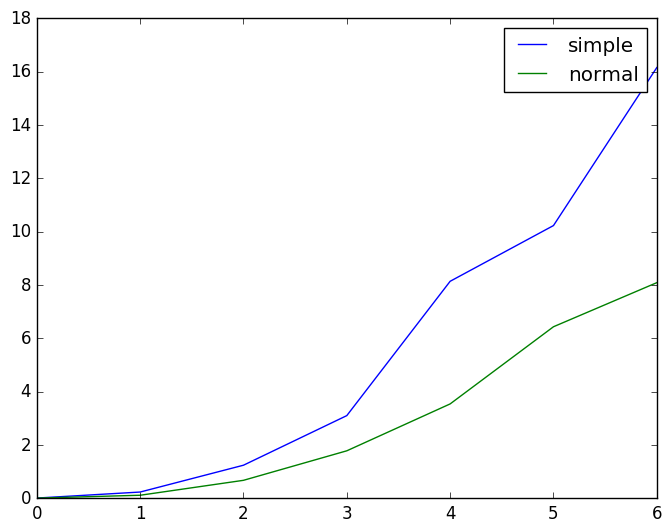

PyObject <matplotlib.legend.Legend object at 0x3202729e8>

In [144]:
plot(get_seconds("0.014245 seconds (135.07 k allocations: 11.316 MB, 38.51% gc time)
  0.240136 seconds (1.80 M allocations: 479.303 MB, 13.51% gc time)
  1.246197 seconds (4.97 M allocations: 2.110 GB, 26.12% gc time)
  3.106522 seconds (7.13 M allocations: 4.570 GB, 38.96% gc time)
  8.143171 seconds (14.36 M allocations: 12.194 GB, 39.38% gc time)
 10.232993 seconds (16.44 M allocations: 16.173 GB, 32.66% gc time)
16.158505 seconds (24.54 M allocations: 28.712 GB, 30.88% gc time)"), label = "simple")
plot(get_seconds("  0.012600 seconds (92.07 k allocations: 7.043 MB, 30.42% gc time)
  0.119666 seconds (787.31 k allocations: 201.074 MB, 9.79% gc time)
  0.679825 seconds (2.23 M allocations: 927.489 MB, 21.45% gc time)
  1.786538 seconds (3.14 M allocations: 1.890 GB, 30.68% gc time)
  3.544882 seconds (5.64 M allocations: 4.535 GB, 32.97% gc time)
  6.438534 seconds (8.78 M allocations: 8.235 GB, 26.43% gc time)
8.091873 seconds (9.68 M allocations: 10.706 GB, 22.88% gc time)"), label = "normal")
legend()

通常版だとシンプル版よりループを回す回数が少なく抑えられているからでしょうか.

---

この後コードを変更してfindfirstをなくしたり, 配列の型を小さくしたりデータ構造を少しだけ変えました.(見づらくなりました)

スピード計測時にrandomな選好表を作る関数の分も上乗せされていたのを修正します.

まずはプログラムの変更でのスピード上昇分を測ります.(再帰なし通常版)

※上のデータと比べるためにとりあえず選好表を作る関数は含んだままにしておきます.

In [13]:
for i in 1:40
    @time speedtest1(10*i, 10*i, 1000, false)
end

  0.013687 seconds (92.06 k allocations: 7.226 MB)
  0.058758 seconds (197.13 k allocations: 20.595 MB, 20.35% gc time)
  0.056876 seconds (314.18 k allocations: 40.490 MB, 17.28% gc time)
  0.098616 seconds (502.24 k allocations: 72.133 MB, 16.36% gc time)
  0.147537 seconds (660.30 k allocations: 105.889 MB, 11.82% gc time)
  0.150112 seconds (758.37 k allocations: 132.577 MB, 16.39% gc time)
  0.215729 seconds (974.42 k allocations: 179.978 MB, 16.46% gc time)
  0.340091 seconds (1.50 M allocations: 251.397 MB, 11.37% gc time)
  0.359890 seconds (1.89 M allocations: 318.328 MB, 13.88% gc time)
  0.382034 seconds (1.74 M allocations: 349.349 MB, 15.41% gc time)
  0.402355 seconds (1.69 M allocations: 399.832 MB, 16.97% gc time)
  0.471069 seconds (2.01 M allocations: 476.572 MB, 16.98% gc time)
  0.844814 seconds (2.66 M allocations: 582.390 MB, 12.74% gc time)
  0.638066 seconds (1.99 M allocations: 592.895 MB, 18.47% gc time)
  0.939131 seconds (3.14 M allocations: 755.757 MB, 15.8

In [10]:
using PyPlot

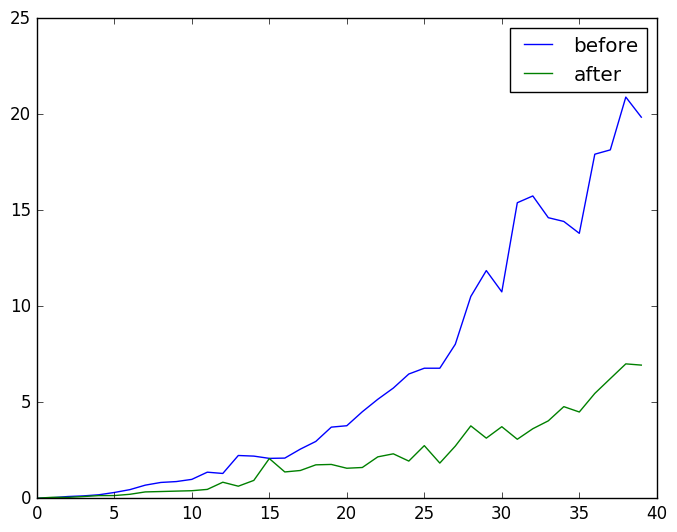

PyObject <matplotlib.legend.Legend object at 0x315ab2198>

In [147]:
revs = get_seconds("0.013687 seconds (92.06 k allocations: 7.226 MB)
  0.058758 seconds (197.13 k allocations: 20.595 MB, 20.35% gc time)
  0.056876 seconds (314.18 k allocations: 40.490 MB, 17.28% gc time)
  0.098616 seconds (502.24 k allocations: 72.133 MB, 16.36% gc time)
  0.147537 seconds (660.30 k allocations: 105.889 MB, 11.82% gc time)
  0.150112 seconds (758.37 k allocations: 132.577 MB, 16.39% gc time)
  0.215729 seconds (974.42 k allocations: 179.978 MB, 16.46% gc time)
  0.340091 seconds (1.50 M allocations: 251.397 MB, 11.37% gc time)
  0.359890 seconds (1.89 M allocations: 318.328 MB, 13.88% gc time)
  0.382034 seconds (1.74 M allocations: 349.349 MB, 15.41% gc time)
  0.402355 seconds (1.69 M allocations: 399.832 MB, 16.97% gc time)
  0.471069 seconds (2.01 M allocations: 476.572 MB, 16.98% gc time)
  0.844814 seconds (2.66 M allocations: 582.390 MB, 12.74% gc time)
  0.638066 seconds (1.99 M allocations: 592.895 MB, 18.47% gc time)
  0.939131 seconds (3.14 M allocations: 755.757 MB, 15.80% gc time)
  2.077835 seconds (4.02 M allocations: 869.611 MB, 10.27% gc time)
  1.380199 seconds (3.12 M allocations: 890.686 MB, 16.30% gc time)
  1.455479 seconds (2.95 M allocations: 979.229 MB, 19.10% gc time)
  1.750106 seconds (4.07 M allocations: 1.095 GB, 13.67% gc time)
  1.771202 seconds (4.91 M allocations: 1.280 GB, 15.24% gc time)
  1.573289 seconds (4.71 M allocations: 1.326 GB, 17.05% gc time)
  1.611797 seconds (4.71 M allocations: 1.481 GB, 19.21% gc time)
  2.166091 seconds (5.48 M allocations: 1.607 GB, 16.41% gc time)
  2.323979 seconds (5.11 M allocations: 1.649 GB, 16.06% gc time)
  1.946263 seconds (5.22 M allocations: 1.759 GB, 14.44% gc time)
  2.750414 seconds (5.83 M allocations: 1.916 GB, 11.25% gc time)
  1.841744 seconds (4.29 M allocations: 1.921 GB, 15.72% gc time)
  2.726255 seconds (6.36 M allocations: 2.198 GB, 11.83% gc time)
  3.779822 seconds (9.24 M allocations: 2.539 GB, 9.01% gc time)
  3.140624 seconds (7.61 M allocations: 2.549 GB, 11.84% gc time)
  3.736348 seconds (6.74 M allocations: 2.619 GB, 10.90% gc time)
  3.082158 seconds (6.34 M allocations: 2.729 GB, 13.26% gc time)
  3.630857 seconds (7.52 M allocations: 2.962 GB, 12.96% gc time)
  4.041891 seconds (7.68 M allocations: 3.123 GB, 11.17% gc time)
  4.781519 seconds (8.48 M allocations: 3.336 GB, 10.73% gc time)
  4.502419 seconds (8.14 M allocations: 3.468 GB, 12.22% gc time)
  5.470003 seconds (11.34 M allocations: 3.870 GB, 10.31% gc time)
  6.241392 seconds (10.09 M allocations: 3.943 GB, 10.08% gc time)
  7.008831 seconds (11.93 M allocations: 4.251 GB, 9.33% gc time)
  6.944698 seconds (11.19 M allocations: 4.372 GB, 12.22% gc time)")
k1 = "0.004421 seconds (71.06 k allocations: 5.624 MB)
  0.037412 seconds (248.12 k allocations: 27.522 MB, 7.17% gc time)
  0.099779 seconds (521.18 k allocations: 81.949 MB, 22.67% gc time)
  0.133260 seconds (634.24 k allocations: 131.947 MB, 24.82% gc time)
  0.191103 seconds (855.30 k allocations: 216.210 MB, 27.00% gc time)
  0.310273 seconds (1.25 M allocations: 333.764 MB, 26.73% gc time)
  0.457669 seconds (1.62 M allocations: 497.376 MB, 27.68% gc time)
  0.692682 seconds (2.14 M allocations: 701.836 MB, 25.76% gc time)
  0.832984 seconds (2.29 M allocations: 840.361 MB, 26.24% gc time)
  0.878811 seconds (3.46 M allocations: 1.400 GB, 9.25% gc time)
  0.993192 seconds (2.74 M allocations: 1.256 GB, 30.86% gc time)
  1.367815 seconds (3.09 M allocations: 1.532 GB, 32.09% gc time)
  1.301243 seconds (2.55 M allocations: 1.312 GB, 30.13% gc time)
  2.237044 seconds (4.48 M allocations: 2.468 GB, 29.92% gc time)
  2.205013 seconds (4.70 M allocations: 2.874 GB, 31.66% gc time)
  2.086873 seconds (4.37 M allocations: 2.701 GB, 32.63% gc time)
  2.101123 seconds (4.19 M allocations: 2.788 GB, 31.85% gc time)
  2.567895 seconds (4.72 M allocations: 3.490 GB, 34.02% gc time)
  2.969407 seconds (5.13 M allocations: 3.732 GB, 31.52% gc time)
  3.714042 seconds (6.52 M allocations: 5.371 GB, 35.73% gc time)
  3.787283 seconds (6.32 M allocations: 5.131 GB, 33.18% gc time)
  4.514897 seconds (6.49 M allocations: 5.807 GB, 31.63% gc time)
  5.164590 seconds (7.76 M allocations: 7.152 GB, 34.44% gc time)
  5.747971 seconds (8.46 M allocations: 7.853 GB, 34.77% gc time)
  6.480615 seconds (8.99 M allocations: 8.347 GB, 24.20% gc time)
  6.782499 seconds (9.74 M allocations: 9.585 GB, 26.25% gc time)
  6.782342 seconds (8.88 M allocations: 8.910 GB, 23.63% gc time)
  8.031126 seconds (10.02 M allocations: 10.516 GB, 23.85% gc time)
 10.519969 seconds (11.87 M allocations: 12.479 GB, 20.23% gc time)
 11.867743 seconds (14.76 M allocations: 16.530 GB, 22.95% gc time)
 10.758971 seconds (12.08 M allocations: 13.944 GB, 23.81% gc time)
 15.402221 seconds (15.50 M allocations: 18.253 GB, 21.33% gc time)
 15.754614 seconds (15.44 M allocations: 18.548 GB, 20.83% gc time)
 14.622754 seconds (14.73 M allocations: 18.252 GB, 21.03% gc time)
 14.426842 seconds (16.11 M allocations: 20.856 GB, 23.57% gc time)
 13.807909 seconds (14.75 M allocations: 19.492 GB, 21.82% gc time)
 17.929274 seconds (20.84 M allocations: 28.949 GB, 24.73% gc time)
 18.154148 seconds (18.20 M allocations: 25.866 GB, 24.07% gc time)
 20.904895 seconds (18.72 M allocations: 26.485 GB, 20.84% gc time)
 19.857537 seconds (19.01 M allocations: 28.425 GB, 23.69% gc time)"

plot(get_seconds(k1), label="before")
plot(revs, label="after")
legend()

速度が半分くらいになっています.
次にランダムな選好表を先に生成しておいて,シンプル版, 再帰版, 再帰無し版のスピードを計測します.

In [104]:
get_seconds2(s) = map(i -> parse(Float64, i), get_seconds(s))

get_seconds2 (generic function with 1 method)

In [58]:
prefss = [DA.generate_random_preference_data(i*10, i*10) for i in 1:30]
prefss2 = [DA.generate_random_preference_data(i*10, i*10) for i in 1:30]
print()

In [59]:
for prefs in prefss
    @time DA.call_simple_match(prefs[1], prefs[2])
end
print()

  0.000061 seconds (46 allocations: 3.547 KB)
  0.000065 seconds (76 allocations: 9.469 KB)
  0.000156 seconds (106 allocations: 19.031 KB)
  0.000173 seconds (136 allocations: 32.641 KB)
  0.000317 seconds (167 allocations: 49.281 KB)
  0.000371 seconds (197 allocations: 65.453 KB)
  0.000525 seconds (227 allocations: 88.344 KB)
  0.000531 seconds (257 allocations: 112.109 KB)
  0.000866 seconds (287 allocations: 140.078 KB)
  0.000944 seconds (317 allocations: 171.203 KB)
  0.000643 seconds (347 allocations: 208.891 KB)
  0.000910 seconds (377 allocations: 246.578 KB)
  0.001028 seconds (407 allocations: 287.406 KB)
  0.001367 seconds (437 allocations: 331.313 KB)
  0.001895 seconds (467 allocations: 383.094 KB)
  0.002124 seconds (497 allocations: 421.016 KB)
  0.002138 seconds (527 allocations: 481.844 KB)
  0.003025 seconds (557 allocations: 549.594 KB)
  0.002201 seconds (587 allocations: 594.828 KB)
  0.001959 seconds (617 allocations: 676.328 KB)
  0.003388 seconds (647 allocat

In [60]:
for prefs in prefss2
    @time DA.call_simple_match(prefs[1], prefs[2])
end
print()

  0.000062 seconds (46 allocations: 3.547 KB)
  0.000072 seconds (76 allocations: 9.469 KB)
  0.000095 seconds (106 allocations: 19.031 KB)
  0.000174 seconds (136 allocations: 32.641 KB)
  0.000215 seconds (167 allocations: 49.281 KB)
  0.000343 seconds (197 allocations: 65.453 KB)
  0.000502 seconds (227 allocations: 88.344 KB)
  0.000612 seconds (257 allocations: 112.109 KB)
  0.000670 seconds (287 allocations: 140.078 KB)
  0.000685 seconds (317 allocations: 171.203 KB)
  0.000786 seconds (347 allocations: 208.891 KB)
  0.001125 seconds (377 allocations: 246.578 KB)
  0.001506 seconds (407 allocations: 287.406 KB)
  0.001837 seconds (437 allocations: 331.313 KB)
  0.001571 seconds (467 allocations: 383.094 KB)
  0.002576 seconds (497 allocations: 421.016 KB)
  0.002097 seconds (527 allocations: 481.844 KB)
  0.002457 seconds (557 allocations: 549.594 KB)
  0.003104 seconds (587 allocations: 594.828 KB)
  0.002999 seconds (617 allocations: 676.328 KB)
  0.003713 seconds (647 allocat

In [105]:
s1 =  " 0.000061 seconds (46 allocations: 3.547 KB)
  0.000065 seconds (76 allocations: 9.469 KB)
  0.000156 seconds (106 allocations: 19.031 KB)
  0.000173 seconds (136 allocations: 32.641 KB)
  0.000317 seconds (167 allocations: 49.281 KB)
  0.000371 seconds (197 allocations: 65.453 KB)
  0.000525 seconds (227 allocations: 88.344 KB)
  0.000531 seconds (257 allocations: 112.109 KB)
  0.000866 seconds (287 allocations: 140.078 KB)
  0.000944 seconds (317 allocations: 171.203 KB)
  0.000643 seconds (347 allocations: 208.891 KB)
  0.000910 seconds (377 allocations: 246.578 KB)
  0.001028 seconds (407 allocations: 287.406 KB)
  0.001367 seconds (437 allocations: 331.313 KB)
  0.001895 seconds (467 allocations: 383.094 KB)
  0.002124 seconds (497 allocations: 421.016 KB)
  0.002138 seconds (527 allocations: 481.844 KB)
  0.003025 seconds (557 allocations: 549.594 KB)
  0.002201 seconds (587 allocations: 594.828 KB)
  0.001959 seconds (617 allocations: 676.328 KB)
  0.003388 seconds (647 allocations: 726.406 KB)
  0.002952 seconds (677 allocations: 826.391 KB)
  0.004581 seconds (707 allocations: 881.781 KB)
  0.003709 seconds (737 allocations: 938.734 KB)
  0.004778 seconds (767 allocations: 1012.922 KB)
  0.005388 seconds (797 allocations: 1.069 MB)
  0.009387 seconds (827 allocations: 1.151 MB)
  0.009082 seconds (857 allocations: 1.237 MB)
  0.010223 seconds (887 allocations: 1.325 MB)
  0.009350 seconds (917 allocations: 1.416 MB)"
s2 =  "0.000062 seconds (46 allocations: 3.547 KB)
  0.000072 seconds (76 allocations: 9.469 KB)
  0.000095 seconds (106 allocations: 19.031 KB)
  0.000174 seconds (136 allocations: 32.641 KB)
  0.000215 seconds (167 allocations: 49.281 KB)
  0.000343 seconds (197 allocations: 65.453 KB)
  0.000502 seconds (227 allocations: 88.344 KB)
  0.000612 seconds (257 allocations: 112.109 KB)
  0.000670 seconds (287 allocations: 140.078 KB)
  0.000685 seconds (317 allocations: 171.203 KB)
  0.000786 seconds (347 allocations: 208.891 KB)
  0.001125 seconds (377 allocations: 246.578 KB)
  0.001506 seconds (407 allocations: 287.406 KB)
  0.001837 seconds (437 allocations: 331.313 KB)
  0.001571 seconds (467 allocations: 383.094 KB)
  0.002576 seconds (497 allocations: 421.016 KB)
  0.002097 seconds (527 allocations: 481.844 KB)
  0.002457 seconds (557 allocations: 549.594 KB)
  0.003104 seconds (587 allocations: 594.828 KB)
  0.002999 seconds (617 allocations: 676.328 KB)
  0.003713 seconds (647 allocations: 726.406 KB)
  0.003957 seconds (677 allocations: 826.391 KB)
  0.004147 seconds (707 allocations: 881.781 KB)
  0.004865 seconds (737 allocations: 938.734 KB)
  0.006430 seconds (767 allocations: 1012.922 KB)
  0.071584 seconds (797 allocations: 1.069 MB, 91.29% gc time)
  0.007282 seconds (827 allocations: 1.151 MB)
  0.006026 seconds (857 allocations: 1.237 MB)
  0.009872 seconds (887 allocations: 1.325 MB)
  0.009277 seconds (917 allocations: 1.416 MB)"
s1 = get_seconds2(s1)
s2 = get_seconds2(s2)
print()

In [64]:
for prefs in prefss
    @time DA.call_match(prefs[1], prefs[2])
end
print()

  0.000334 seconds (92 allocations: 7.391 KB)
  0.000098 seconds (209 allocations: 22.000 KB)
  0.000192 seconds (423 allocations: 49.922 KB)
  0.000217 seconds (504 allocations: 73.922 KB)
  0.000347 seconds (819 allocations: 120.703 KB)
  0.000372 seconds (948 allocations: 150.406 KB)
  0.000408 seconds (1.25 k allocations: 205.672 KB)
  0.000417 seconds (1.25 k allocations: 237.719 KB)
  0.000669 seconds (1.85 k allocations: 322.969 KB)
  0.000754 seconds (1.95 k allocations: 373.938 KB)
  0.000564 seconds (1.51 k allocations: 394.578 KB)
  0.000814 seconds (1.90 k allocations: 478.047 KB)
  0.001072 seconds (2.08 k allocations: 550.656 KB)
  0.001338 seconds (2.44 k allocations: 641.516 KB)
  0.001461 seconds (3.32 k allocations: 786.797 KB)
  0.001478 seconds (3.48 k allocations: 846.953 KB)
  0.001751 seconds (3.57 k allocations: 945.766 KB)
  0.001740 seconds (4.03 k allocations: 1.061 MB)
  0.001684 seconds (3.47 k allocations: 1.074 MB)
  0.002708 seconds (3.18 k allocations: 

In [66]:
for prefs in prefss2
    @time DA.call_match(prefs[1], prefs[2])
end
print()

  0.000152 seconds (100 allocations: 8.016 KB)
  0.000079 seconds (226 allocations: 23.328 KB)
  0.000065 seconds (313 allocations: 41.328 KB)
  0.000139 seconds (492 allocations: 72.984 KB)
  0.000149 seconds (609 allocations: 104.297 KB)
  0.000210 seconds (865 allocations: 143.922 KB)
  0.000821 seconds (961 allocations: 183.016 KB)
  0.000368 seconds (1.29 k allocations: 240.141 KB)
  0.000292 seconds (1.31 k allocations: 280.547 KB)
  0.000356 seconds (1.40 k allocations: 331.359 KB)
  0.000439 seconds (1.51 k allocations: 394.969 KB)
  0.000598 seconds (2.11 k allocations: 494.688 KB)
  0.000552 seconds (2.12 k allocations: 553.703 KB)
  0.000609 seconds (2.58 k allocations: 652.219 KB)
  0.000451 seconds (2.06 k allocations: 688.438 KB)
  0.000724 seconds (3.22 k allocations: 826.641 KB)
  0.000622 seconds (2.40 k allocations: 854.438 KB)
  0.000857 seconds (2.99 k allocations: 1004.734 KB)
  0.000925 seconds (3.83 k allocations: 1.101 MB)
  0.000984 seconds (3.41 k allocations:

In [106]:
n1 =  "  0.000334 seconds (92 allocations: 7.391 KB)
  0.000098 seconds (209 allocations: 22.000 KB)
  0.000192 seconds (423 allocations: 49.922 KB)
  0.000217 seconds (504 allocations: 73.922 KB)
  0.000347 seconds (819 allocations: 120.703 KB)
  0.000372 seconds (948 allocations: 150.406 KB)
  0.000408 seconds (1.25 k allocations: 205.672 KB)
  0.000417 seconds (1.25 k allocations: 237.719 KB)
  0.000669 seconds (1.85 k allocations: 322.969 KB)
  0.000754 seconds (1.95 k allocations: 373.938 KB)
  0.000564 seconds (1.51 k allocations: 394.578 KB)
  0.000814 seconds (1.90 k allocations: 478.047 KB)
  0.001072 seconds (2.08 k allocations: 550.656 KB)
  0.001338 seconds (2.44 k allocations: 641.516 KB)
  0.001461 seconds (3.32 k allocations: 786.797 KB)
  0.001478 seconds (3.48 k allocations: 846.953 KB)
  0.001751 seconds (3.57 k allocations: 945.766 KB)
  0.001740 seconds (4.03 k allocations: 1.061 MB)
  0.001684 seconds (3.47 k allocations: 1.074 MB)
  0.002708 seconds (3.18 k allocations: 1.177 MB)
  0.003021 seconds (5.34 k allocations: 1.405 MB)
  0.002511 seconds (4.49 k allocations: 1.498 MB)
  0.003007 seconds (4.89 k allocations: 1.598 MB)
  0.057599 seconds (5.12 k allocations: 1.687 MB, 95.02% gc time)
  0.004027 seconds (7.50 k allocations: 1.972 MB)
  0.003803 seconds (6.30 k allocations: 1.998 MB)
  0.005217 seconds (6.79 k allocations: 2.155 MB)
  0.005191 seconds (6.56 k allocations: 2.262 MB)
  0.007261 seconds (7.17 k allocations: 2.438 MB)
  0.009698 seconds (8.76 k allocations: 2.693 MB)"
n2 =  " 0.000152 seconds (100 allocations: 8.016 KB)
  0.000079 seconds (226 allocations: 23.328 KB)
  0.000065 seconds (313 allocations: 41.328 KB)
  0.000139 seconds (492 allocations: 72.984 KB)
  0.000149 seconds (609 allocations: 104.297 KB)
  0.000210 seconds (865 allocations: 143.922 KB)
  0.000821 seconds (961 allocations: 183.016 KB)
  0.000368 seconds (1.29 k allocations: 240.141 KB)
  0.000292 seconds (1.31 k allocations: 280.547 KB)
  0.000356 seconds (1.40 k allocations: 331.359 KB)
  0.000439 seconds (1.51 k allocations: 394.969 KB)
  0.000598 seconds (2.11 k allocations: 494.688 KB)
  0.000552 seconds (2.12 k allocations: 553.703 KB)
  0.000609 seconds (2.58 k allocations: 652.219 KB)
  0.000451 seconds (2.06 k allocations: 688.438 KB)
  0.000724 seconds (3.22 k allocations: 826.641 KB)
  0.000622 seconds (2.40 k allocations: 854.438 KB)
  0.000857 seconds (2.99 k allocations: 1004.734 KB)
  0.000925 seconds (3.83 k allocations: 1.101 MB)
  0.000984 seconds (3.41 k allocations: 1.195 MB)
  0.001077 seconds (3.79 k allocations: 1.286 MB)
  0.002550 seconds (3.75 k allocations: 1.441 MB)
  0.001409 seconds (4.24 k allocations: 1.549 MB)
  0.006566 seconds (4.96 k allocations: 1.675 MB, 70.20% gc time)
  0.002900 seconds (7.43 k allocations: 1.967 MB)
  0.003138 seconds (5.65 k allocations: 1.948 MB)
  0.002964 seconds (7.36 k allocations: 2.198 MB)
  0.003244 seconds (5.51 k allocations: 2.183 MB)
  0.008754 seconds (7.48 k allocations: 2.462 MB)
  0.009590 seconds (8.63 k allocations: 2.683 MB)"
n1 = get_seconds2(n1)
n2 = get_seconds2(n2)
print()

In [75]:
for prefs in prefss
    @time DA.call_match(prefs[1], prefs[2], true)
end
print()

  0.000068 seconds (92 allocations: 7.391 KB)
  0.000035 seconds (209 allocations: 22.000 KB)
  0.000063 seconds (423 allocations: 49.922 KB)
  0.000079 seconds (504 allocations: 73.922 KB)
  0.000136 seconds (819 allocations: 120.703 KB)
  0.000178 seconds (948 allocations: 150.406 KB)
  0.000204 seconds (1.25 k allocations: 205.672 KB)
  0.000205 seconds (1.25 k allocations: 237.719 KB)
  0.000344 seconds (1.85 k allocations: 322.969 KB)
  0.000415 seconds (1.95 k allocations: 373.938 KB)
  0.000327 seconds (1.51 k allocations: 394.578 KB)
  0.000563 seconds (1.90 k allocations: 478.047 KB)
  0.000571 seconds (2.08 k allocations: 550.656 KB)
  0.000832 seconds (2.44 k allocations: 641.516 KB)
  0.001060 seconds (3.32 k allocations: 786.797 KB)
  0.001185 seconds (3.48 k allocations: 846.953 KB)
  0.004882 seconds (3.57 k allocations: 945.766 KB, 80.88% gc time)
  0.001088 seconds (4.03 k allocations: 1.061 MB)
  0.000897 seconds (3.47 k allocations: 1.074 MB)
  0.000860 seconds (3.18

In [76]:
for prefs in prefss2
    @time DA.call_match(prefs[1], prefs[2], true)
end
print()

  0.000062 seconds (100 allocations: 8.016 KB)
  0.000053 seconds (226 allocations: 23.328 KB)
  0.000066 seconds (313 allocations: 41.328 KB)
  0.000106 seconds (492 allocations: 72.984 KB)
  0.000142 seconds (609 allocations: 104.297 KB)
  0.000201 seconds (865 allocations: 143.922 KB)
  0.000239 seconds (961 allocations: 183.016 KB)
  0.000507 seconds (1.29 k allocations: 240.141 KB)
  0.000349 seconds (1.31 k allocations: 280.547 KB)
  0.000422 seconds (1.40 k allocations: 331.359 KB)
  0.000513 seconds (1.51 k allocations: 394.969 KB)
  0.000635 seconds (2.11 k allocations: 494.688 KB)
  0.000778 seconds (2.12 k allocations: 553.703 KB)
  0.000919 seconds (2.58 k allocations: 652.219 KB)
  0.000831 seconds (2.06 k allocations: 688.438 KB)
  0.001183 seconds (3.22 k allocations: 826.641 KB)
  0.001054 seconds (2.40 k allocations: 854.438 KB)
  0.001314 seconds (2.99 k allocations: 1004.734 KB)
  0.001537 seconds (3.83 k allocations: 1.101 MB)
  0.001691 seconds (3.41 k allocations:

In [107]:
r1 = "0.000068 seconds (92 allocations: 7.391 KB)
  0.000035 seconds (209 allocations: 22.000 KB)
  0.000063 seconds (423 allocations: 49.922 KB)
  0.000079 seconds (504 allocations: 73.922 KB)
  0.000136 seconds (819 allocations: 120.703 KB)
  0.000178 seconds (948 allocations: 150.406 KB)
  0.000204 seconds (1.25 k allocations: 205.672 KB)
  0.000205 seconds (1.25 k allocations: 237.719 KB)
  0.000344 seconds (1.85 k allocations: 322.969 KB)
  0.000415 seconds (1.95 k allocations: 373.938 KB)
  0.000327 seconds (1.51 k allocations: 394.578 KB)
  0.000563 seconds (1.90 k allocations: 478.047 KB)
  0.000571 seconds (2.08 k allocations: 550.656 KB)
  0.000832 seconds (2.44 k allocations: 641.516 KB)
  0.001060 seconds (3.32 k allocations: 786.797 KB)
  0.001185 seconds (3.48 k allocations: 846.953 KB)
  0.004882 seconds (3.57 k allocations: 945.766 KB, 80.88% gc time)
  0.001088 seconds (4.03 k allocations: 1.061 MB)
  0.000897 seconds (3.47 k allocations: 1.074 MB)
  0.000860 seconds (3.18 k allocations: 1.177 MB)
  0.001890 seconds (5.34 k allocations: 1.405 MB)
  0.001359 seconds (4.49 k allocations: 1.498 MB)
  0.001623 seconds (4.89 k allocations: 1.598 MB)
  0.002285 seconds (5.12 k allocations: 1.687 MB)
  0.002709 seconds (7.50 k allocations: 1.972 MB)
  0.002560 seconds (6.30 k allocations: 1.998 MB)
  0.004497 seconds (6.79 k allocations: 2.155 MB)
  0.003503 seconds (6.56 k allocations: 2.262 MB)
  0.004586 seconds (7.17 k allocations: 2.438 MB)
  0.006513 seconds (8.76 k allocations: 2.693 MB, 41.48% gc time)"
r2 = "0.000062 seconds (100 allocations: 8.016 KB)
  0.000053 seconds (226 allocations: 23.328 KB)
  0.000066 seconds (313 allocations: 41.328 KB)
  0.000106 seconds (492 allocations: 72.984 KB)
  0.000142 seconds (609 allocations: 104.297 KB)
  0.000201 seconds (865 allocations: 143.922 KB)
  0.000239 seconds (961 allocations: 183.016 KB)
  0.000507 seconds (1.29 k allocations: 240.141 KB)
  0.000349 seconds (1.31 k allocations: 280.547 KB)
  0.000422 seconds (1.40 k allocations: 331.359 KB)
  0.000513 seconds (1.51 k allocations: 394.969 KB)
  0.000635 seconds (2.11 k allocations: 494.688 KB)
  0.000778 seconds (2.12 k allocations: 553.703 KB)
  0.000919 seconds (2.58 k allocations: 652.219 KB)
  0.000831 seconds (2.06 k allocations: 688.438 KB)
  0.001183 seconds (3.22 k allocations: 826.641 KB)
  0.001054 seconds (2.40 k allocations: 854.438 KB)
  0.001314 seconds (2.99 k allocations: 1004.734 KB)
  0.001537 seconds (3.83 k allocations: 1.101 MB)
  0.001691 seconds (3.41 k allocations: 1.195 MB)
  0.001940 seconds (3.79 k allocations: 1.286 MB)
  0.001943 seconds (3.75 k allocations: 1.441 MB)
  0.002052 seconds (4.24 k allocations: 1.549 MB)
  0.002619 seconds (4.96 k allocations: 1.675 MB)
  0.003852 seconds (7.43 k allocations: 1.967 MB)
  0.003359 seconds (5.65 k allocations: 1.948 MB)
  0.007033 seconds (7.36 k allocations: 2.198 MB, 37.46% gc time)
  0.003122 seconds (5.51 k allocations: 2.183 MB)
  0.005775 seconds (7.48 k allocations: 2.462 MB)
  0.013919 seconds (8.63 k allocations: 2.683 MB)"

r1 = get_seconds2(r1)
r2 = get_seconds2(r2)

30-element Array{Float64,1}:
 6.2e-5  
 5.3e-5  
 6.6e-5  
 0.000106
 0.000142
 0.000201
 0.000239
 0.000507
 0.000349
 0.000422
 0.000513
 0.000635
 0.000778
 ⋮       
 0.001537
 0.001691
 0.00194 
 0.001943
 0.002052
 0.002619
 0.003852
 0.003359
 0.007033
 0.003122
 0.005775
 0.013919

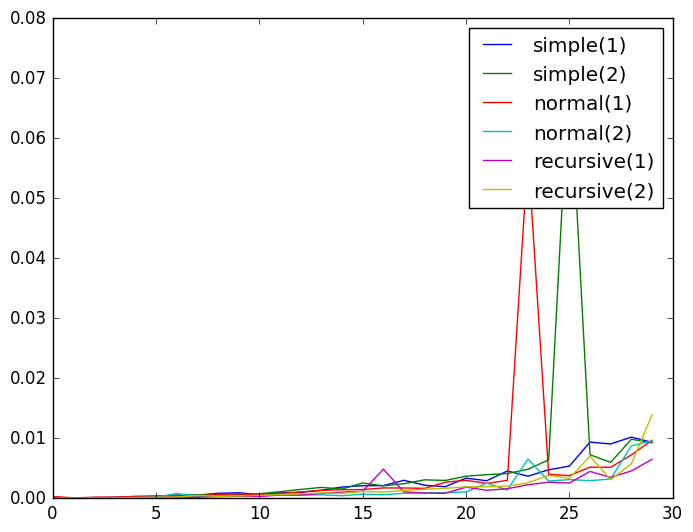

PyObject <matplotlib.legend.Legend object at 0x3218567b8>

In [108]:
plot(s1, label ="simple(1)")
plot(s2, label = "simple(2)")
plot(n1, label = "normal(1)")
plot(n2, label = "normal(2)")
plot(r1, label = "recursive(1)")
plot(r2, label = "recursive(2)")
legend()

外れ値が邪魔なので除外すると,

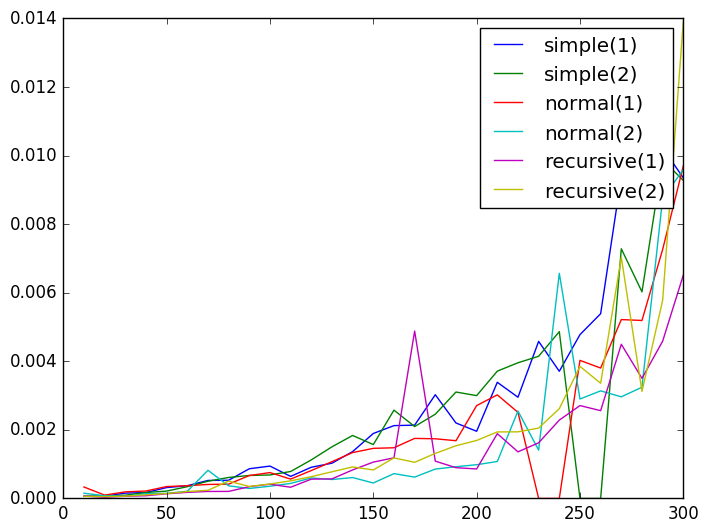

PyObject <matplotlib.legend.Legend object at 0x31d0dfa20>

In [112]:
s2[26] = 0
n1[24] = 0
xs = 10:10:300

plot(xs, s1, label ="simple(1)")
plot(xs, s2, label = "simple(2)")
plot(xs, n1, label = "normal(1)")
plot(xs, n2, label = "normal(2)")
plot(xs, r1, label = "recursive(1)")
plot(xs, r2, label = "recursive(2)")
legend()

どれも似たようなものとなりました.

m, nが300以降の時に差が出そうなのでそこをplotしてみます.

In [140]:
prefss = [DA.generate_random_preference_data(i*10, i*10) for i in 30:100]
prefss2 = [DA.generate_random_preference_data(i*10, i*10) for i in 30:100]
print()

In [141]:
xs = 300:10:1000

labels = ["simple1", "simple2", "normal1", "normal2", "recursive1", "recursive2"]
fs = [DA.call_simple_match, DA.call_match, DA.call_match, (m, f) -> DA.call_match(m, f, true)]
for i in 1:3
    for (m, f) in prefss
        @time fs[i](m, f)
    end
    for (m, f) in prefss2
        @time fs[i](m, f)
    end
end

  0.009129 seconds (917 allocations: 1.416 MB)
  0.009274 seconds (947 allocations: 1.511 MB)
  0.007484 seconds (977 allocations: 1.608 MB)
  0.010769 seconds (1.01 k allocations: 1.709 MB)
  0.012465 seconds (1.04 k allocations: 1.813 MB)
  0.014293 seconds (1.07 k allocations: 1.919 MB)
  0.011384 seconds (1.10 k allocations: 2.029 MB)
  0.014248 seconds (1.13 k allocations: 2.142 MB)
  0.011885 seconds (1.16 k allocations: 2.258 MB)
  0.029350 seconds (1.19 k allocations: 2.377 MB)
  0.020161 seconds (1.22 k allocations: 2.499 MB)
  0.017643 seconds (1.25 k allocations: 2.624 MB)
  0.029638 seconds (1.28 k allocations: 2.752 MB)
  0.045103 seconds (1.31 k allocations: 2.883 MB)
  0.018109 seconds (1.34 k allocations: 3.017 MB)
  0.024426 seconds (1.37 k allocations: 3.154 MB)
  0.020370 seconds (1.40 k allocations: 3.294 MB)
  0.021987 seconds (1.43 k allocations: 3.438 MB)
  0.032624 seconds (1.46 k allocations: 3.584 MB)
  0.029399 seconds (1.49 k allocations: 3.734 MB)
  0.02796

In [142]:
allss = get_seconds2("0.009129 seconds (917 allocations: 1.416 MB)
  0.009274 seconds (947 allocations: 1.511 MB)
  0.007484 seconds (977 allocations: 1.608 MB)
  0.010769 seconds (1.01 k allocations: 1.709 MB)
  0.012465 seconds (1.04 k allocations: 1.813 MB)
  0.014293 seconds (1.07 k allocations: 1.919 MB)
  0.011384 seconds (1.10 k allocations: 2.029 MB)
  0.014248 seconds (1.13 k allocations: 2.142 MB)
  0.011885 seconds (1.16 k allocations: 2.258 MB)
  0.029350 seconds (1.19 k allocations: 2.377 MB)
  0.020161 seconds (1.22 k allocations: 2.499 MB)
  0.017643 seconds (1.25 k allocations: 2.624 MB)
  0.029638 seconds (1.28 k allocations: 2.752 MB)
  0.045103 seconds (1.31 k allocations: 2.883 MB)
  0.018109 seconds (1.34 k allocations: 3.017 MB)
  0.024426 seconds (1.37 k allocations: 3.154 MB)
  0.020370 seconds (1.40 k allocations: 3.294 MB)
  0.021987 seconds (1.43 k allocations: 3.438 MB)
  0.032624 seconds (1.46 k allocations: 3.584 MB)
  0.029399 seconds (1.49 k allocations: 3.734 MB)
  0.027961 seconds (1.52 k allocations: 3.886 MB)
  0.029888 seconds (1.55 k allocations: 4.041 MB)
  0.028471 seconds (7.86 k allocations: 4.296 MB)
  0.542545 seconds (8.24 k allocations: 4.463 MB, 93.79% gc time)
  0.026858 seconds (10.20 k allocations: 4.657 MB)
  0.028771 seconds (12.07 k allocations: 4.853 MB)
  0.024150 seconds (12.18 k allocations: 5.025 MB)
  0.051690 seconds (18.61 k allocations: 5.296 MB, 27.21% gc time)
  0.033867 seconds (14.94 k allocations: 5.417 MB)
  0.036329 seconds (20.13 k allocations: 5.675 MB)
  0.027228 seconds (16.95 k allocations: 5.810 MB)
  0.078439 seconds (22.36 k allocations: 6.078 MB, 54.62% gc time)
  0.029622 seconds (23.37 k allocations: 6.282 MB)
  0.032879 seconds (21.20 k allocations: 6.440 MB)
  0.040030 seconds (26.75 k allocations: 6.720 MB)
  0.033104 seconds (27.55 k allocations: 6.930 MB, 9.65% gc time)
  0.045393 seconds (30.37 k allocations: 7.174 MB)
  0.043350 seconds (29.34 k allocations: 7.362 MB)
  0.082619 seconds (32.67 k allocations: 7.620 MB, 4.64% gc time)
  0.072746 seconds (30.70 k allocations: 7.800 MB)
  0.058841 seconds (29.28 k allocations: 7.991 MB)
  0.076485 seconds (41.90 k allocations: 8.399 MB, 5.68% gc time)
  0.073314 seconds (41.51 k allocations: 8.613 MB)
  0.068518 seconds (36.63 k allocations: 8.761 MB, 4.81% gc time)
  0.053133 seconds (41.00 k allocations: 9.052 MB)
  0.046012 seconds (39.34 k allocations: 9.256 MB)
  0.044011 seconds (39.96 k allocations: 9.496 MB, 6.92% gc time)
  0.050118 seconds (52.26 k allocations: 9.918 MB)
  0.061661 seconds (49.89 k allocations: 10.120 MB, 4.68% gc time)
  0.048913 seconds (51.11 k allocations: 10.379 MB)
  0.087765 seconds (55.99 k allocations: 10.697 MB, 6.74% gc time)
  0.058032 seconds (54.27 k allocations: 10.917 MB)
  0.086060 seconds (72.74 k allocations: 11.449 MB, 8.90% gc time)
  0.072596 seconds (69.57 k allocations: 11.653 MB)
  0.078794 seconds (66.23 k allocations: 11.858 MB, 4.44% gc time)
  0.086769 seconds (64.69 k allocations: 12.093 MB)
  0.070877 seconds (69.40 k allocations: 12.427 MB, 8.11% gc time)
  0.060147 seconds (75.33 k allocations: 12.782 MB)
  0.069880 seconds (67.88 k allocations: 12.937 MB, 4.64% gc time)
  0.053227 seconds (69.98 k allocations: 13.240 MB)
  0.065903 seconds (56.41 k allocations: 13.307 MB, 4.78% gc time)
  0.070496 seconds (83.80 k allocations: 14.002 MB)
  0.086989 seconds (95.89 k allocations: 14.467 MB, 3.80% gc time)
  0.077386 seconds (81.78 k allocations: 14.535 MB, 3.38% gc time)
  0.070979 seconds (68.77 k allocations: 14.622 MB)
  0.084061 seconds (94.25 k allocations: 15.300 MB, 3.60% gc time)
  0.109442 seconds (87.19 k allocations: 15.485 MB, 3.00% gc time)
  0.082028 seconds (83.36 k allocations: 15.722 MB)
  0.075921 seconds (79.42 k allocations: 15.960 MB, 4.07% gc time)
  0.110161 seconds (84.74 k allocations: 16.343 MB, 3.77% gc time)
  0.170235 seconds (78.11 k allocations: 16.547 MB)
  0.014590 seconds (917 allocations: 1.416 MB)
  0.023831 seconds (947 allocations: 1.511 MB, 29.94% gc time)
  0.011429 seconds (977 allocations: 1.608 MB)
  0.021358 seconds (1.01 k allocations: 1.709 MB)
  0.013277 seconds (1.04 k allocations: 1.813 MB)
  0.014333 seconds (1.07 k allocations: 1.919 MB)
  0.020227 seconds (1.10 k allocations: 2.029 MB)
  0.014717 seconds (1.13 k allocations: 2.142 MB)
  0.011713 seconds (1.16 k allocations: 2.258 MB)
  0.010292 seconds (1.19 k allocations: 2.377 MB)
  0.010109 seconds (1.22 k allocations: 2.499 MB)
  0.012681 seconds (1.25 k allocations: 2.624 MB)
  0.012653 seconds (1.28 k allocations: 2.752 MB, 21.27% gc time)
  0.011812 seconds (1.31 k allocations: 2.883 MB)
  0.014040 seconds (1.34 k allocations: 3.017 MB)
  0.025403 seconds (1.37 k allocations: 3.154 MB)
  0.020901 seconds (1.40 k allocations: 3.294 MB)
  0.015928 seconds (1.43 k allocations: 3.438 MB)
  0.019094 seconds (1.46 k allocations: 3.584 MB)
  0.021860 seconds (1.49 k allocations: 3.734 MB, 18.25% gc time)
  0.033024 seconds (1.52 k allocations: 3.886 MB)
  0.029245 seconds (1.55 k allocations: 4.041 MB)
  0.030801 seconds (8.09 k allocations: 4.300 MB)
  0.022904 seconds (9.74 k allocations: 4.486 MB)
  0.026552 seconds (9.10 k allocations: 4.640 MB, 11.16% gc time)
  0.022630 seconds (11.09 k allocations: 4.838 MB)
  0.024616 seconds (13.17 k allocations: 5.040 MB)
  0.020642 seconds (13.27 k allocations: 5.215 MB)
  0.028246 seconds (17.25 k allocations: 5.452 MB, 9.50% gc time)
  0.026836 seconds (18.67 k allocations: 5.653 MB)
  0.029671 seconds (17.57 k allocations: 5.819 MB)
  0.026636 seconds (19.08 k allocations: 6.028 MB)
  0.028267 seconds (20.76 k allocations: 6.242 MB, 11.13% gc time)
  0.032968 seconds (21.48 k allocations: 6.445 MB)
  0.034690 seconds (26.30 k allocations: 6.713 MB)
  0.035694 seconds (30.06 k allocations: 6.968 MB, 9.05% gc time)
  0.051677 seconds (28.50 k allocations: 7.145 MB)
  0.047230 seconds (32.26 k allocations: 7.406 MB)
  0.052814 seconds (33.03 k allocations: 7.625 MB, 6.41% gc time)
  0.035839 seconds (31.30 k allocations: 7.809 MB)
  0.035595 seconds (34.71 k allocations: 8.074 MB)
  0.055290 seconds (37.16 k allocations: 8.327 MB, 5.14% gc time)
  0.052409 seconds (42.60 k allocations: 8.630 MB)
  0.055728 seconds (41.22 k allocations: 8.831 MB)
  0.041856 seconds (40.14 k allocations: 9.039 MB, 8.56% gc time)
  0.047205 seconds (49.50 k allocations: 9.410 MB)
  0.047857 seconds (44.02 k allocations: 9.558 MB, 6.16% gc time)
  0.063556 seconds (57.30 k allocations: 9.995 MB)
  0.087841 seconds (59.66 k allocations: 10.269 MB, 3.98% gc time)
  0.080251 seconds (50.36 k allocations: 10.368 MB)
  0.067195 seconds (66.76 k allocations: 10.861 MB)
  0.058766 seconds (55.03 k allocations: 10.929 MB, 5.41% gc time)
  0.068546 seconds (61.50 k allocations: 11.277 MB)
  0.051247 seconds (49.58 k allocations: 11.348 MB, 5.61% gc time)
  0.070344 seconds (65.41 k allocations: 11.845 MB)
  0.054621 seconds (61.34 k allocations: 12.042 MB, 5.07% gc time)
  0.055674 seconds (57.85 k allocations: 12.251 MB)
  0.067895 seconds (80.43 k allocations: 12.860 MB, 4.75% gc time)
  0.069375 seconds (72.48 k allocations: 13.007 MB)
  0.051531 seconds (64.14 k allocations: 13.151 MB, 6.92% gc time)
  0.078942 seconds (76.93 k allocations: 13.620 MB)
  0.077981 seconds (76.92 k allocations: 13.897 MB, 5.51% gc time)
  0.093429 seconds (84.87 k allocations: 14.299 MB, 3.04% gc time)
  0.082465 seconds (82.84 k allocations: 14.551 MB)
  0.102572 seconds (102.51 k allocations: 15.137 MB, 4.24% gc time)
  0.070548 seconds (81.48 k allocations: 15.106 MB, 3.69% gc time)
  0.072033 seconds (90.17 k allocations: 15.530 MB)
  0.100468 seconds (106.83 k allocations: 16.080 MB, 5.06% gc time)
  0.079815 seconds (91.27 k allocations: 16.141 MB, 3.80% gc time)
  0.062726 seconds (86.01 k allocations: 16.362 MB)
  0.094010 seconds (115.80 k allocations: 17.122 MB, 4.99% gc time)
  0.004642 seconds (8.73 k allocations: 2.691 MB)
  0.004758 seconds (7.33 k allocations: 2.723 MB)
  0.007265 seconds (6.97 k allocations: 2.839 MB)
  0.009612 seconds (7.86 k allocations: 3.054 MB)
  0.012493 seconds (8.06 k allocations: 3.221 MB, 45.50% gc time)
  0.006049 seconds (7.25 k allocations: 3.316 MB)
  0.006061 seconds (8.59 k allocations: 3.580 MB)
  0.007366 seconds (11.01 k allocations: 3.930 MB)
  0.008260 seconds (10.33 k allocations: 4.049 MB)
  0.010297 seconds (12.00 k allocations: 4.351 MB)
  0.013648 seconds (9.44 k allocations: 4.336 MB, 41.53% gc time)
  0.009034 seconds (12.14 k allocations: 4.726 MB)
  0.011327 seconds (15.94 k allocations: 5.205 MB)
  0.010038 seconds (11.21 k allocations: 5.038 MB)
  0.016368 seconds (12.79 k allocations: 5.356 MB, 28.86% gc time)
  0.010953 seconds (15.00 k allocations: 5.727 MB)
  0.010378 seconds (12.78 k allocations: 5.765 MB)
  0.008863 seconds (13.51 k allocations: 6.032 MB)
  0.014849 seconds (14.30 k allocations: 6.309 MB, 22.36% gc time)
  0.010181 seconds (13.22 k allocations: 6.448 MB)
  0.010599 seconds (14.46 k allocations: 6.767 MB)
  0.016141 seconds (16.54 k allocations: 7.156 MB, 22.86% gc time)
  0.016953 seconds (18.61 k allocations: 7.447 MB)
  0.012894 seconds (17.53 k allocations: 7.589 MB)
  0.016898 seconds (19.93 k allocations: 7.971 MB, 17.94% gc time)
  0.015011 seconds (23.25 k allocations: 8.435 MB)
  0.014746 seconds (19.36 k allocations: 8.376 MB)
  0.022936 seconds (26.43 k allocations: 9.087 MB, 13.17% gc time)
  0.015819 seconds (21.67 k allocations: 9.004 MB)
  0.024263 seconds (26.09 k allocations: 9.517 MB, 14.74% gc time)
  0.017480 seconds (22.77 k allocations: 9.567 MB)
  0.025643 seconds (28.22 k allocations: 10.174 MB, 14.60% gc time)
  0.028060 seconds (28.04 k allocations: 10.408 MB)
  0.030852 seconds (24.89 k allocations: 10.478 MB, 10.60% gc time)
  0.033995 seconds (30.81 k allocations: 11.126 MB)
  0.024125 seconds (30.12 k allocations: 11.318 MB, 13.68% gc time)
  0.021458 seconds (32.74 k allocations: 11.766 MB)
  0.027426 seconds (30.94 k allocations: 11.948 MB, 11.26% gc time)
  0.023079 seconds (33.29 k allocations: 12.358 MB)
  0.024997 seconds (31.99 k allocations: 12.604 MB, 11.94% gc time)
  0.018521 seconds (29.85 k allocations: 12.794 MB)
  0.025482 seconds (40.91 k allocations: 13.701 MB, 11.42% gc time)
  0.025320 seconds (39.21 k allocations: 13.885 MB, 14.05% gc time)
  0.021363 seconds (34.74 k allocations: 13.982 MB)
  0.029802 seconds (38.03 k allocations: 14.471 MB, 17.67% gc time)
  0.026147 seconds (36.89 k allocations: 14.765 MB, 11.81% gc time)
  0.020503 seconds (37.81 k allocations: 15.140 MB)
  0.033436 seconds (47.64 k allocations: 16.000 MB, 10.41% gc time)
  0.026870 seconds (43.88 k allocations: 16.108 MB, 13.56% gc time)
  0.029028 seconds (44.32 k allocations: 16.475 MB)
  0.034226 seconds (48.31 k allocations: 17.033 MB, 11.57% gc time)
  0.031410 seconds (47.57 k allocations: 17.383 MB, 8.47% gc time)
  0.035468 seconds (61.78 k allocations: 18.431 MB, 8.49% gc time)
  0.034408 seconds (58.88 k allocations: 18.652 MB, 7.54% gc time)
  0.025174 seconds (54.55 k allocations: 18.760 MB)
  0.046667 seconds (53.35 k allocations: 19.155 MB, 8.88% gc time)
  0.038927 seconds (57.34 k allocations: 19.666 MB, 8.46% gc time)
  0.056845 seconds (61.55 k allocations: 20.272 MB, 10.87% gc time)
  0.037021 seconds (55.11 k allocations: 20.332 MB, 13.94% gc time)
  0.036554 seconds (55.60 k allocations: 20.730 MB, 9.89% gc time)
  0.033103 seconds (46.36 k allocations: 20.726 MB, 8.95% gc time)
  0.038685 seconds (65.90 k allocations: 22.040 MB, 8.15% gc time)
  0.048327 seconds (75.17 k allocations: 22.897 MB, 6.84% gc time)
  0.040950 seconds (65.16 k allocations: 22.855 MB, 6.85% gc time)
  0.027835 seconds (54.20 k allocations: 22.702 MB, 10.09% gc time)
  0.038785 seconds (74.12 k allocations: 24.082 MB, 7.90% gc time)
  0.040684 seconds (68.20 k allocations: 24.240 MB, 6.55% gc time)
  0.033529 seconds (63.57 k allocations: 24.417 MB, 9.74% gc time)
  0.035949 seconds (61.57 k allocations: 24.769 MB, 8.60% gc time)
  0.040421 seconds (64.29 k allocations: 25.345 MB, 8.94% gc time)
  0.032776 seconds (60.47 k allocations: 25.622 MB, 10.01% gc time)
  0.003604 seconds (6.50 k allocations: 2.521 MB)
  0.008793 seconds (7.66 k allocations: 2.748 MB, 57.39% gc time)
  0.003432 seconds (8.49 k allocations: 2.954 MB)
  0.004118 seconds (7.95 k allocations: 3.061 MB)
  0.004849 seconds (9.08 k allocations: 3.299 MB)
  0.003378 seconds (7.63 k allocations: 3.345 MB)
  0.004961 seconds (10.69 k allocations: 3.740 MB)
  0.005679 seconds (11.75 k allocations: 3.987 MB)
  0.012225 seconds (9.75 k allocations: 4.005 MB, 60.42% gc time)
  0.005300 seconds (10.45 k allocations: 4.234 MB)
  0.004952 seconds (8.71 k allocations: 4.281 MB)
  0.005007 seconds (9.68 k allocations: 4.539 MB)
  0.004728 seconds (9.61 k allocations: 4.722 MB)
  0.010661 seconds (10.96 k allocations: 5.019 MB, 48.84% gc time)
  0.005491 seconds (11.53 k allocations: 5.260 MB)
  0.007962 seconds (13.95 k allocations: 5.647 MB)
  0.006266 seconds (11.33 k allocations: 5.654 MB)
  0.012811 seconds (14.79 k allocations: 6.130 MB, 38.33% gc time)
  0.010861 seconds (14.91 k allocations: 6.356 MB)
  0.006877 seconds (12.93 k allocations: 6.425 MB)
  0.014493 seconds (19.30 k allocations: 7.137 MB, 27.02% gc time)
  0.010596 seconds (20.20 k allocations: 7.435 MB)
  0.011462 seconds (20.92 k allocations: 7.631 MB)
  0.014140 seconds (19.02 k allocations: 7.693 MB, 17.79% gc time)
  0.008853 seconds (17.61 k allocations: 7.809 MB)
  0.010372 seconds (19.28 k allocations: 8.138 MB)
  0.017731 seconds (20.72 k allocations: 8.467 MB, 20.54% gc time)
  0.010050 seconds (19.59 k allocations: 8.631 MB)
  0.016669 seconds (25.54 k allocations: 9.267 MB, 20.82% gc time)
  0.013116 seconds (25.47 k allocations: 9.490 MB)
  0.012985 seconds (23.80 k allocations: 9.647 MB)
  0.015012 seconds (24.07 k allocations: 9.914 MB, 19.98% gc time)
  0.012967 seconds (24.67 k allocations: 10.201 MB)
  0.016788 seconds (24.89 k allocations: 10.482 MB, 19.33% gc time)
  0.016997 seconds (30.18 k allocations: 11.065 MB)
  0.020691 seconds (33.91 k allocations: 11.561 MB, 15.81% gc time)
  0.015363 seconds (30.74 k allocations: 11.656 MB)
  0.021387 seconds (33.41 k allocations: 12.076 MB, 12.53% gc time)
  0.016026 seconds (33.24 k allocations: 12.350 MB)
  0.017328 seconds (31.56 k allocations: 12.559 MB, 19.19% gc time)
  0.020016 seconds (33.25 k allocations: 12.944 MB, 12.80% gc time)
  0.016312 seconds (36.22 k allocations: 13.427 MB)
  0.022431 seconds (39.62 k allocations: 13.904 MB, 13.45% gc time)
  0.017013 seconds (38.80 k allocations: 14.182 MB)
  0.020921 seconds (37.21 k allocations: 14.421 MB, 16.99% gc time)
  0.028011 seconds (44.57 k allocations: 15.137 MB, 11.13% gc time)
  0.017841 seconds (40.78 k allocations: 15.276 MB)
  0.029219 seconds (51.52 k allocations: 16.178 MB, 12.90% gc time)
  0.039776 seconds (52.21 k allocations: 16.613 MB, 7.49% gc time)
  0.028273 seconds (45.05 k allocations: 16.536 MB, 11.95% gc time)
  0.025869 seconds (58.67 k allocations: 17.569 MB)
  0.033463 seconds (47.11 k allocations: 17.340 MB, 11.60% gc time)
  0.027999 seconds (52.82 k allocations: 17.979 MB, 12.02% gc time)
  0.028646 seconds (41.63 k allocations: 17.760 MB, 11.85% gc time)
  0.035324 seconds (54.66 k allocations: 18.822 MB, 9.16% gc time)
  0.026098 seconds (51.75 k allocations: 19.044 MB)
  0.026520 seconds (48.72 k allocations: 19.259 MB, 16.13% gc time)
  0.039626 seconds (67.92 k allocations: 20.630 MB, 8.04% gc time)
  0.029693 seconds (58.46 k allocations: 20.483 MB, 11.08% gc time)
  0.027381 seconds (51.92 k allocations: 20.550 MB, 23.93% gc time)
  0.036596 seconds (62.62 k allocations: 21.525 MB, 8.31% gc time)
  0.041954 seconds (60.28 k allocations: 21.767 MB, 7.90% gc time)
  0.045189 seconds (66.65 k allocations: 22.521 MB, 7.07% gc time)
  0.039452 seconds (65.38 k allocations: 22.861 MB, 7.82% gc time)
  0.059630 seconds (79.61 k allocations: 23.988 MB, 4.85% gc time)
  0.034271 seconds (65.16 k allocations: 23.693 MB, 9.49% gc time)
  0.043374 seconds (70.09 k allocations: 24.345 MB, 9.93% gc time)
  0.061856 seconds (82.25 k allocations: 25.340 MB, 5.59% gc time)
  0.060462 seconds (69.33 k allocations: 25.146 MB, 8.67% gc time)
  0.043116 seconds (66.48 k allocations: 25.437 MB, 8.58% gc time)
  0.049483 seconds (88.13 k allocations: 26.925 MB, 5.84% gc time)
  0.006589 seconds (8.73 k allocations: 2.691 MB, 54.02% gc time)
  0.003249 seconds (7.33 k allocations: 2.723 MB)
  0.003632 seconds (6.97 k allocations: 2.839 MB)
  0.003801 seconds (7.86 k allocations: 3.054 MB)
  0.004274 seconds (8.06 k allocations: 3.221 MB)
  0.003632 seconds (7.25 k allocations: 3.316 MB)
  0.005034 seconds (8.59 k allocations: 3.580 MB)
  0.012580 seconds (11.01 k allocations: 3.930 MB, 48.76% gc time)
  0.004917 seconds (10.33 k allocations: 4.049 MB)
  0.005836 seconds (12.00 k allocations: 4.351 MB)
  0.004431 seconds (9.44 k allocations: 4.336 MB)
  0.007131 seconds (12.14 k allocations: 4.726 MB)
  0.015123 seconds (15.94 k allocations: 5.205 MB, 37.50% gc time)
  0.005408 seconds (11.21 k allocations: 5.038 MB)
  0.006367 seconds (12.79 k allocations: 5.356 MB)
  0.007304 seconds (15.00 k allocations: 5.727 MB)
  0.011275 seconds (12.78 k allocations: 5.765 MB, 43.18% gc time)
  0.006424 seconds (13.51 k allocations: 6.032 MB)
  0.009857 seconds (14.30 k allocations: 6.309 MB)
  0.011529 seconds (13.22 k allocations: 6.448 MB)
  0.011786 seconds (14.46 k allocations: 6.767 MB, 31.26% gc time)
  0.008753 seconds (16.54 k allocations: 7.156 MB)
  0.010711 seconds (18.61 k allocations: 7.447 MB)
  0.013086 seconds (17.53 k allocations: 7.589 MB, 24.43% gc time)
  0.011017 seconds (19.93 k allocations: 7.971 MB)
  0.013524 seconds (23.25 k allocations: 8.435 MB)
  0.015167 seconds (19.36 k allocations: 8.376 MB, 23.92% gc time)
  0.017475 seconds (26.43 k allocations: 9.087 MB)
  0.016884 seconds (21.67 k allocations: 9.004 MB, 19.56% gc time)
  0.013372 seconds (26.09 k allocations: 9.517 MB)
  0.010962 seconds (22.77 k allocations: 9.567 MB)
  0.017027 seconds (28.22 k allocations: 10.174 MB, 18.19% gc time)
  0.012840 seconds (28.04 k allocations: 10.408 MB)
  0.015339 seconds (24.89 k allocations: 10.478 MB, 23.54% gc time)
  0.020042 seconds (30.81 k allocations: 11.126 MB)
  0.017576 seconds (30.12 k allocations: 11.318 MB, 24.26% gc time)
  0.015900 seconds (32.74 k allocations: 11.766 MB)
  0.017840 seconds (30.94 k allocations: 11.948 MB, 19.50% gc time)
  0.016023 seconds (33.29 k allocations: 12.358 MB)
  0.018511 seconds (31.99 k allocations: 12.604 MB, 18.14% gc time)
  0.017776 seconds (29.85 k allocations: 12.794 MB)
  0.025330 seconds (40.91 k allocations: 13.701 MB, 14.17% gc time)
  0.020060 seconds (39.21 k allocations: 13.885 MB, 16.47% gc time)
  0.017396 seconds (34.74 k allocations: 13.982 MB)
  0.025626 seconds (38.03 k allocations: 14.471 MB, 15.42% gc time)
  0.021876 seconds (36.89 k allocations: 14.765 MB, 12.85% gc time)
  0.016570 seconds (37.81 k allocations: 15.140 MB)
  0.031655 seconds (47.64 k allocations: 16.000 MB, 11.07% gc time)
  0.023329 seconds (43.88 k allocations: 16.108 MB, 14.14% gc time)
  0.025606 seconds (44.32 k allocations: 16.475 MB)
  0.028833 seconds (48.31 k allocations: 17.033 MB, 15.21% gc time)
  0.027924 seconds (47.57 k allocations: 17.383 MB, 10.69% gc time)
  0.035790 seconds (61.78 k allocations: 18.431 MB, 9.41% gc time)
  0.031238 seconds (58.88 k allocations: 18.652 MB, 10.23% gc time)
  0.027286 seconds (54.55 k allocations: 18.760 MB)
  0.045904 seconds (53.35 k allocations: 19.155 MB, 8.32% gc time)
  0.038778 seconds (57.34 k allocations: 19.666 MB, 18.79% gc time)
  0.036941 seconds (61.55 k allocations: 20.272 MB, 7.71% gc time)
  0.030104 seconds (55.11 k allocations: 20.332 MB, 8.84% gc time)
  0.036669 seconds (55.60 k allocations: 20.730 MB, 9.47% gc time)
  0.032629 seconds (46.36 k allocations: 20.726 MB, 10.25% gc time)
  0.037777 seconds (65.90 k allocations: 22.040 MB, 6.94% gc time)
  0.045457 seconds (75.17 k allocations: 22.897 MB, 6.53% gc time)
  0.035020 seconds (65.16 k allocations: 22.855 MB, 7.64% gc time)
  0.027268 seconds (54.20 k allocations: 22.702 MB, 11.67% gc time)
  0.046413 seconds (74.12 k allocations: 24.082 MB, 7.79% gc time)
  0.052153 seconds (68.20 k allocations: 24.240 MB, 7.23% gc time)
  0.040505 seconds (63.57 k allocations: 24.417 MB, 7.06% gc time)
  0.036070 seconds (61.57 k allocations: 24.769 MB, 10.03% gc time)
  0.039951 seconds (64.29 k allocations: 25.345 MB, 8.23% gc time)
  0.041532 seconds (60.47 k allocations: 25.622 MB, 8.02% gc time)
  0.002599 seconds (6.50 k allocations: 2.521 MB)
  0.006836 seconds (7.66 k allocations: 2.748 MB, 58.74% gc time)
  0.003305 seconds (8.49 k allocations: 2.954 MB)
  0.003128 seconds (7.95 k allocations: 3.061 MB)
  0.004070 seconds (9.08 k allocations: 3.299 MB)
  0.003673 seconds (7.63 k allocations: 3.345 MB)
  0.006342 seconds (10.69 k allocations: 3.740 MB)
  0.006638 seconds (11.75 k allocations: 3.987 MB)
  0.009969 seconds (9.75 k allocations: 4.005 MB, 57.81% gc time)
  0.004508 seconds (10.45 k allocations: 4.234 MB)
  0.004797 seconds (8.71 k allocations: 4.281 MB)
  0.006353 seconds (9.68 k allocations: 4.539 MB)
  0.004810 seconds (9.61 k allocations: 4.722 MB)
  0.013081 seconds (10.96 k allocations: 5.019 MB, 44.13% gc time)
  0.007698 seconds (11.53 k allocations: 5.260 MB)
  0.008938 seconds (13.95 k allocations: 5.647 MB)
  0.005823 seconds (11.33 k allocations: 5.654 MB)
  0.012086 seconds (14.79 k allocations: 6.130 MB, 37.19% gc time)
  0.008034 seconds (14.91 k allocations: 6.356 MB)
  0.007149 seconds (12.93 k allocations: 6.425 MB)
  0.013705 seconds (19.30 k allocations: 7.137 MB, 23.53% gc time)
  0.009575 seconds (20.20 k allocations: 7.435 MB)
  0.011568 seconds (20.92 k allocations: 7.631 MB)
  0.018461 seconds (19.02 k allocations: 7.693 MB, 14.32% gc time)
  0.010301 seconds (17.61 k allocations: 7.809 MB)
  0.008896 seconds (19.28 k allocations: 8.138 MB)
  0.013671 seconds (20.72 k allocations: 8.467 MB, 19.51% gc time)
  0.010877 seconds (19.59 k allocations: 8.631 MB)
  0.016074 seconds (25.54 k allocations: 9.267 MB, 20.26% gc time)
  0.012419 seconds (25.47 k allocations: 9.490 MB)
  0.012113 seconds (23.80 k allocations: 9.647 MB)
  0.019602 seconds (24.07 k allocations: 9.914 MB, 16.97% gc time)
  0.014886 seconds (24.67 k allocations: 10.201 MB)
  0.016880 seconds (24.89 k allocations: 10.482 MB, 15.43% gc time)
  0.014733 seconds (30.18 k allocations: 11.065 MB)
  0.017765 seconds (33.91 k allocations: 11.561 MB, 17.40% gc time)
  0.016559 seconds (30.74 k allocations: 11.656 MB)
  0.023122 seconds (33.41 k allocations: 12.076 MB, 12.54% gc time)
  0.017788 seconds (33.24 k allocations: 12.350 MB)
  0.017359 seconds (31.56 k allocations: 12.559 MB, 19.49% gc time)
  0.019088 seconds (33.25 k allocations: 12.944 MB, 16.00% gc time)
  0.016608 seconds (36.22 k allocations: 13.427 MB)
  0.027365 seconds (39.62 k allocations: 13.904 MB, 13.31% gc time)
  0.018486 seconds (38.80 k allocations: 14.182 MB)
  0.021597 seconds (37.21 k allocations: 14.421 MB, 17.35% gc time)
  0.024346 seconds (44.57 k allocations: 15.137 MB, 12.61% gc time)
  0.017586 seconds (40.78 k allocations: 15.276 MB)
  0.030376 seconds (51.52 k allocations: 16.178 MB, 12.68% gc time)
  0.044137 seconds (52.21 k allocations: 16.613 MB, 8.64% gc time)
  0.024680 seconds (45.05 k allocations: 16.536 MB, 12.73% gc time)
  0.027421 seconds (58.67 k allocations: 17.569 MB)
  0.032013 seconds (47.11 k allocations: 17.340 MB, 12.49% gc time)
  0.026549 seconds (52.82 k allocations: 17.979 MB, 11.33% gc time)
  0.027171 seconds (41.63 k allocations: 17.760 MB, 10.83% gc time)
  0.039746 seconds (54.66 k allocations: 18.822 MB, 8.30% gc time)
  0.029633 seconds (51.75 k allocations: 19.044 MB)
  0.025696 seconds (48.72 k allocations: 19.259 MB, 15.94% gc time)
  0.033821 seconds (67.92 k allocations: 20.630 MB, 9.36% gc time)
  0.032545 seconds (58.46 k allocations: 20.483 MB, 10.17% gc time)
  0.024917 seconds (51.92 k allocations: 20.550 MB, 15.42% gc time)
  0.036521 seconds (62.62 k allocations: 21.525 MB, 8.44% gc time)
  0.034935 seconds (60.28 k allocations: 21.767 MB, 9.05% gc time)
  0.046860 seconds (66.65 k allocations: 22.521 MB, 5.96% gc time)
  0.040968 seconds (65.38 k allocations: 22.861 MB, 7.63% gc time)
  0.055117 seconds (79.61 k allocations: 23.988 MB, 5.76% gc time)
  0.037854 seconds (65.16 k allocations: 23.693 MB, 9.01% gc time)
  0.043963 seconds (70.09 k allocations: 24.345 MB, 6.29% gc time)
  0.047014 seconds (82.25 k allocations: 25.340 MB, 7.90% gc time)
  0.064176 seconds (69.33 k allocations: 25.146 MB, 7.52% gc time)
  0.032589 seconds (66.48 k allocations: 25.437 MB, 10.90% gc time)
  0.051156 seconds (88.13 k allocations: 26.925 MB, 7.90% gc time)")

426-element Array{Float64,1}:
 0.009129
 0.009274
 0.007484
 0.010769
 0.012465
 0.014293
 0.011384
 0.014248
 0.011885
 0.02935 
 0.020161
 0.017643
 0.029638
 ⋮       
 0.024917
 0.036521
 0.034935
 0.04686 
 0.040968
 0.055117
 0.037854
 0.043963
 0.047014
 0.064176
 0.032589
 0.051156

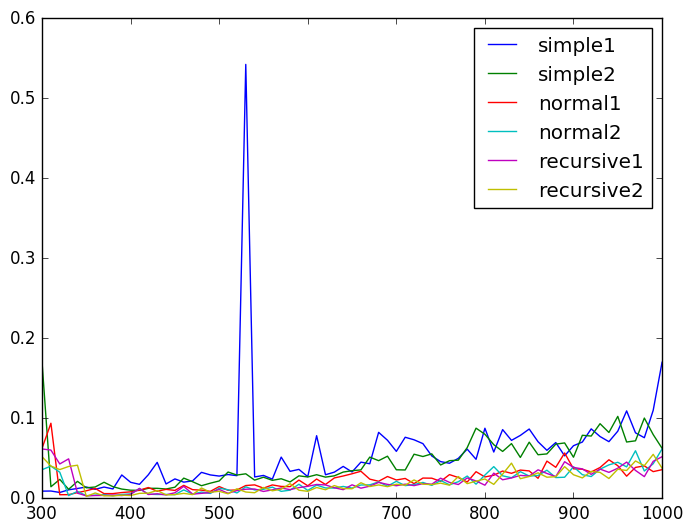

PyObject <matplotlib.legend.Legend object at 0x3207dc978>

In [143]:
for i in 1:6
    plot(xs, allss[(i-1)*70+1: (i-1)*70+71], label =labels[i])
end
legend()

simple版が少し遅いようです. 再帰版と再帰なし通常版が同じになったのは, ほぼすべての変数を使い回すようにしたことでスタックに詰める必要のある変数が減ったからでしょうか.

In [157]:
m_prefs, f_prefs = DA.generate_random_preference_data(5000, 5000)
print()

In [154]:
m_matched, f_matched = @time DA.call_match(m_prefs, f_prefs)

  1.513338 seconds (1.23 M allocations: 616.941 MB, 8.54% gc time)


([3948,1561,48,4823,1299,672,2213,187,2373,3606  …  2948,4821,2959,4898,3901,4191,1078,492,945,3125],[3248,268,4940,2461,4249,3323,31,2771,1372,2052  …  814,197,1209,192,1872,2859,2689,3962,2223,4024])

In [155]:
DA.stable_matching(m_matched, f_matched, m_prefs, f_prefs)

true

In [156]:
DA.check_results(m_matched, f_matched)

true

In [158]:
m_prefs, f_prefs = DA.generate_random_preference_data(10000, 10000)
print()

In [160]:
m_matched, f_matched = @time DA.call_match(m_prefs, f_prefs)

 11.013483 seconds (3.12 M allocations: 2.343 GB, 5.02% gc time)


([6456,2,442,3300,9679,3334,4573,669,488,3163  …  2306,2597,4002,1180,5376,721,303,6752,1903,8266],[7047,2,9722,2898,6964,3727,1807,5150,4333,615  …  1527,5911,7902,5506,1233,2316,1569,5235,5949,2546])

In [161]:
DA.stable_matching(m_matched, f_matched, m_prefs, f_prefs)

true

In [163]:
m_prefs, f_prefs = DA.generate_random_preference_data(1000, 1000)
print()

In [171]:
@time DA.call_match(m_prefs, f_prefs)

  0.036207 seconds (72.02 k allocations: 26.139 MB, 11.47% gc time)


([143,631,393,839,702,299,317,816,0,3  …  108,447,964,156,81,682,834,811,27,490],[346,22,10,318,812,411,198,840,797,231  …  466,116,478,321,135,360,260,500,738,530])

In [172]:
m_prefs, f_prefs = DA.generate_random_preference_data(4, 4)
print()

In [174]:
@time DA.call_match(m_prefs, f_prefs)

  0.000061 seconds (50 allocations: 2.844 KB)


([0,2,4,0],[0,2,0,3])